In [0]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
res=pd.read_csv("/content/drive/My Drive/Colab Notebooks/RestaurantRatings/res.csv")

In [0]:
res.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [0]:
res.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


In [0]:
res["Rating"].describe()

count    115897.000000
mean          3.987441
std           0.678814
min          -1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: Rating, dtype: float64

In [0]:
res.isnull().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

In [0]:
res.Rating.unique()


array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. , -1. ,  nan])

In [0]:
len(res.Rating.unique())

11

In [0]:
res.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [0]:
res["Price Range"].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [0]:
import re
z=[]
for s in (res["Price Range"]):

  if s=='$$ - $$$':
    s=2.5
    z.append(s)
  

  elif s=='$':
    s=1
    z.append(s)
    
  elif s=='$$$$':
    s=4
    z.append(s)
  else:
    s=2.5
    z.append(s)
  


In [0]:
res["Price Range"]=z

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,2.5,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,2.5,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


In [0]:
res["Price Range"].value_counts()

2.5    102215
1.0     19005
4.0      4307
Name: Price Range, dtype: int64

In [0]:
res["Cuisine Style"].value_counts()

['Italian']                                                                                                                                                             3473
['French']                                                                                                                                                              2569
['Spanish']                                                                                                                                                             2130
['Cafe']                                                                                                                                                                1492
['Pizza']                                                                                                                                                               1198
                                                                                                                                       

In [0]:
res["URL_TA"]

0         /Restaurant_Review-g188590-d11752080-Reviews-M...
1         /Restaurant_Review-g188590-d693419-Reviews-De_...
2         /Restaurant_Review-g188590-d696959-Reviews-La_...
3         /Restaurant_Review-g188590-d1239229-Reviews-Vi...
4         /Restaurant_Review-g188590-d6864170-Reviews-Li...
                                ...                        
125522    /Restaurant_Review-g188113-d13273526-Reviews-K...
125523    /Restaurant_Review-g188113-d13292844-Reviews-B...
125524    /Restaurant_Review-g188113-d13296092-Reviews-R...
125525    /Restaurant_Review-g188113-d13323362-Reviews-Y...
125526    /Restaurant_Review-g188113-d13349842-Reviews-D...
Name: URL_TA, Length: 125527, dtype: object

In [0]:
res=res.drop(columns="URL_TA")

In [0]:
res["Rating"].value_counts()

 4.0    39843
 4.5    31326
 3.5    19745
 5.0    11257
 3.0     8524
 2.5     2720
 2.0     1437
 1.0      620
 1.5      384
-1.0       41
Name: Rating, dtype: int64

In [0]:
res["Rating"]=res["Rating"].dropna()

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",d6864170
...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,2.5,NaN,NaN,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,2.5,NaN,NaN,d13323362


In [0]:
res = res.loc[(res.Rating != -1) , :]

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",d6864170
...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,2.5,NaN,NaN,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,2.5,NaN,NaN,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,2.5,NaN,NaN,d13323362


In [0]:
revs=res.dropna(how='all')

In [0]:
res=res.dropna(subset=["Rating"]) 

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",d6864170
...,...,...,...,...,...,...,...,...,...,...
125450,1590,not guilty Bellevue,Zurich,"['International', 'European', 'Contemporary', ...",1596.0,1.0,2.5,NaN,"[[], []]",d12378701
125451,1591,Ly's Take Away,Zurich,NaN,1597.0,1.0,2.5,2.0,"[['Poor quality, small portions, miserable st....",d12870151
125452,1592,Restaurant Gasthof Hirschen,Zurich,"['German', 'Swiss', 'European', 'Central Europ...",1598.0,1.0,2.5,2.0,"[[], []]",d12959896
125453,1593,Hukka Restaurant & Hookah Lounge,Zurich,"['German', 'Belgian', 'Mediterranean', 'Europe...",1601.0,1.0,4.0,NaN,"[[], []]",d11796028


In [0]:
res.isnull().sum()


Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        26843
Ranking                105
Rating                   0
Price Range              0
Number of Reviews     7678
Reviews                  4
ID_TA                    0
dtype: int64

In [0]:
res=res.dropna() 

In [0]:
res.isnull().sum()

Unnamed: 0           0
Name                 0
City                 0
Cuisine Style        0
Ranking              0
Rating               0
Price Range          0
Number of Reviews    0
Reviews              0
ID_TA                0
dtype: int64

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",d6864170
...,...,...,...,...,...,...,...,...,...,...
125441,1581,Restaurant Wehrlischloss,Zurich,"['Steakhouse', 'Swiss', 'European']",1587.0,2.0,2.5,8.0,"[['Very basic'], ['05/11/2016']]",d8462360
125443,1583,Swiss Food Delivery,Zurich,"['Italian', 'Chinese', 'American', 'Indian', '...",1589.0,2.5,2.5,3.0,"[['Good Service'], ['12/15/2015']]",d8287558
125445,1585,Ristorante La Taverna,Zurich,"['Italian', 'Vegetarian Friendly']",1591.0,4.5,2.5,16.0,"[['Super local eatery', 'Small and charming pl...",d5768767
125448,1588,Pizza Blitz Zurich,Zurich,['Pizza'],1594.0,2.0,2.5,5.0,"[[""Don't waste your time, go somewhere else!"",...",d4354266


In [0]:
res["Reviews"].value_counts()

[[], []]                                                                                                       7480
[['Very Good', 'Poor and cold food'], ['03/31/2017', '12/10/2017']]                                               2
[['Original', 'A FOODIES DREAM PLACE'], ['09/10/2017', '12/29/2017']]                                             2
[['Nice cafe at Hotel Preciados', 'Inside the Hotel Preciados, very nice'], ['10/20/2017', '10/18/2017']]         2
[['Best Restaurant in Madrid', 'A must anytime I go to Spain'], ['03/26/2017', '03/16/2017']]                     2
                                                                                                               ... 
[['great cocktail!', 'One for the gin lovers!'], ['01/05/2018', '09/08/2017']]                                    1
[['Breakfast', 'Very bad experience'], ['08/24/2016', '10/28/2015']]                                              1
[['sandwishe', 'Decent fast food'], ['11/06/2016', '08/27/2015']]       

In [0]:
res["Rating"].value_counts()

4.0    31178
4.5    25343
3.5    15633
5.0     5425
3.0     5222
2.5     1733
2.0      638
1.5      222
1.0       92
Name: Rating, dtype: int64

In [0]:
k=[]
for s in res["Reviews"]:
  if s!="[[], []]":
    k.append(s)



In [0]:
k

["[['Just like home', 'A Warm Welcome to Wintry Amsterdam'], ['01/03/2018', '01/01/2018']]",
 "[['Great food and staff', 'just perfect'], ['01/06/2018', '01/04/2018']]",
 "[['Satisfaction', 'Delicious old school restaurant'], ['01/04/2018', '01/04/2018']]",
 "[['True five star dinner', 'A superb evening of fine dining, hospitali...'], ['12/20/2017', '12/17/2017']]",
 "[['Best meal.... EVER', 'super food experience'], ['01/06/2018', '01/04/2018']]",
 "[['A treat!', 'Wow just Wow'], ['01/01/2018', '12/26/2017']]",
 "[['40th Birthday with my Family', 'One of the best meals ever!'], ['01/07/2018', '01/05/2018']]",
 "[['Great Experience', 'A true delight'], ['01/08/2018', '01/07/2018']]",
 "[['Great Food & Service!', 'Superior food and exciting setting around...'], ['12/30/2017', '12/29/2017']]",
 "[['Excellent Herring', 'Lovely, rustic fish shop in the smack of A...'], ['01/09/2018', '01/06/2018']]",
 "[['Simply AMAZING!', 'Delicious Burgers'], ['01/01/2018', '11/22/2017']]",
 "[['A hidden

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,"[['Great food and staff', 'just perfect'], ['0...",d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,"[['Satisfaction', 'Delicious old school restau...",d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,"[['True five star dinner', 'A superb evening o...",d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,"[['Best meal.... EVER', 'super food experience...",d6864170
...,...,...,...,...,...,...,...,...,...,...
125441,1581,Restaurant Wehrlischloss,Zurich,"['Steakhouse', 'Swiss', 'European']",1587.0,2.0,2.5,8.0,"[['Very basic'], ['05/11/2016']]",d8462360
125443,1583,Swiss Food Delivery,Zurich,"['Italian', 'Chinese', 'American', 'Indian', '...",1589.0,2.5,2.5,3.0,"[['Good Service'], ['12/15/2015']]",d8287558
125445,1585,Ristorante La Taverna,Zurich,"['Italian', 'Vegetarian Friendly']",1591.0,4.5,2.5,16.0,"[['Super local eatery', 'Small and charming pl...",d5768767
125448,1588,Pizza Blitz Zurich,Zurich,['Pizza'],1594.0,2.0,2.5,5.0,"[[""Don't waste your time, go somewhere else!"",...",d4354266


In [0]:
res["Reviews"].value_counts()

[[], []]                                                                                                       7480
[['Very Good', 'Poor and cold food'], ['03/31/2017', '12/10/2017']]                                               2
[['Original', 'A FOODIES DREAM PLACE'], ['09/10/2017', '12/29/2017']]                                             2
[['Nice cafe at Hotel Preciados', 'Inside the Hotel Preciados, very nice'], ['10/20/2017', '10/18/2017']]         2
[['Best Restaurant in Madrid', 'A must anytime I go to Spain'], ['03/26/2017', '03/16/2017']]                     2
                                                                                                               ... 
[['great cocktail!', 'One for the gin lovers!'], ['01/05/2018', '09/08/2017']]                                    1
[['Breakfast', 'Very bad experience'], ['08/24/2016', '10/28/2015']]                                              1
[['sandwishe', 'Decent fast food'], ['11/06/2016', '08/27/2015']]       

In [0]:
res = res.loc[(res.Reviews != "[[], []]") , :]

In [0]:
res["Reviews"].value_counts()

[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]                                   2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                              2
[['Last time we order', 'Outstanding Thai food'], ['12/10/2016', '03/05/2016']]                                           2
[['A nice place for easy eating', 'Hidden Treasure'], ['07/16/2017', '04/02/2017']]                                       2
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]             2
                                                                                                                         ..
[['Good neighbourhood home-madr pasta'], ['07/29/2015']]                                                                  1
[['Tehran restaurant best Persian dood', 'Tour'], ['11/09/2017', '08/03/2017']]                                           1
[['So ta

In [0]:
res.shape

(78006, 10)

In [0]:
import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this

from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image


In [0]:



def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x=re.sub(r"\d\d/\d\d/\d\d\d\d","",x)
    x=re.sub(r'\{}, \[], \(\)',"",x)
   

    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [0]:
res["Reviews"] = res["Reviews"].fillna("").apply(preprocess)

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0,812.0,great food and staff just perfect,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170
...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,"['Italian', 'Pizza']",1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890
125441,1581,Restaurant Wehrlischloss,Zurich,"['Steakhouse', 'Swiss', 'European']",1587.0,2.0,2.5,8.0,havery basic,d8462360
125443,1583,Swiss Food Delivery,Zurich,"['Italian', 'Chinese', 'American', 'Indian', '...",1589.0,2.5,2.5,3.0,good service,d8287558
125445,1585,Ristorante La Taverna,Zurich,"['Italian', 'Vegetarian Friendly']",1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767


In [0]:
res["Cuisine Style"] = res["Cuisine Style"].fillna("").apply(preprocess)

In [0]:
res

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170
...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767


In [0]:
res["Rating"].value_counts()

4.0    29337
4.5    23323
3.5    14364
3.0     4604
5.0     4236
2.5     1415
2.0      500
1.5      170
1.0       57
Name: Rating, dtype: int64

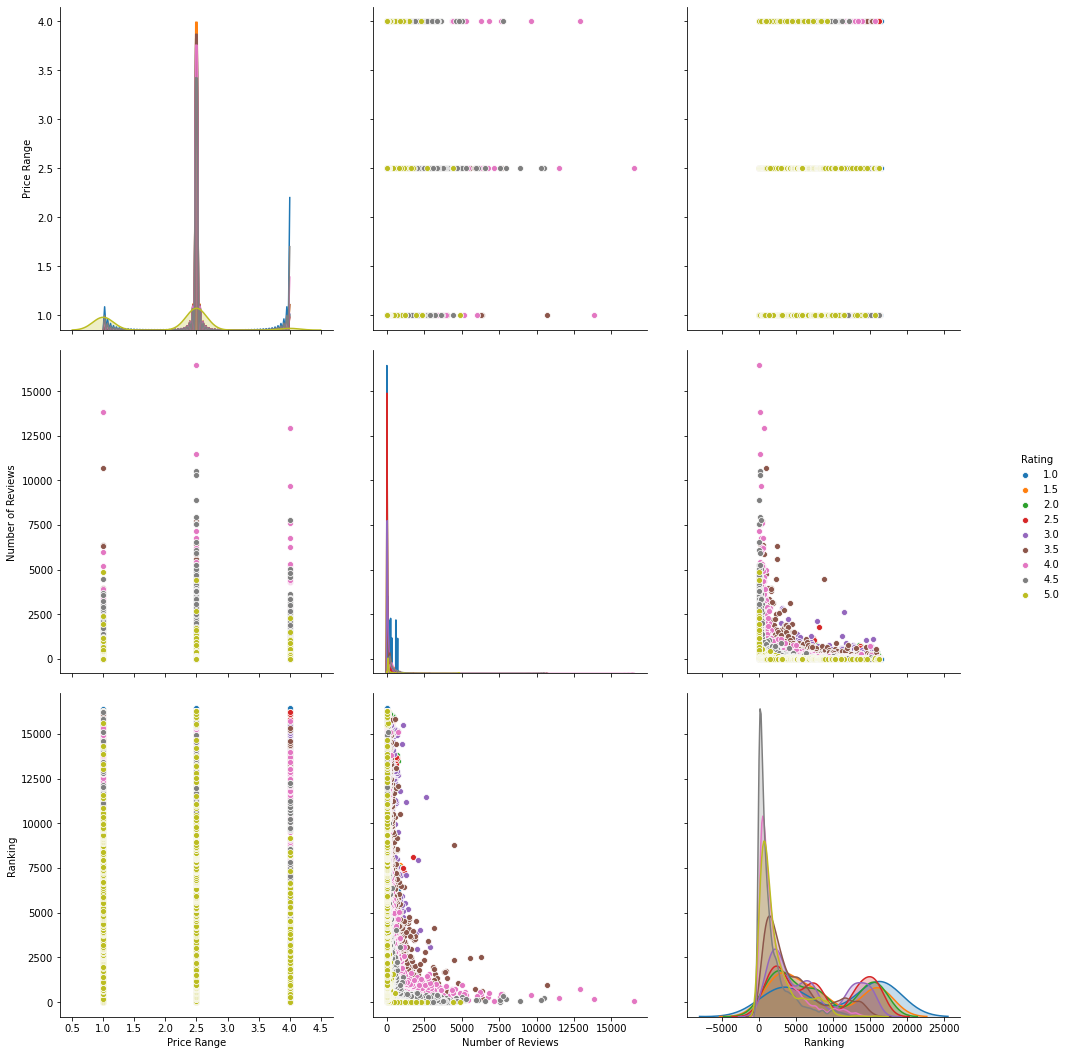

In [0]:

n = res.shape[0]
g=sns.pairplot(res[['Price Range', 'Number of Reviews',"Ranking" ,'Rating']], hue='Rating', vars=['Price Range', 'Number of Reviews',"Ranking"])
g.fig.set_size_inches(15,15)
plt.show()

In [0]:
df=res

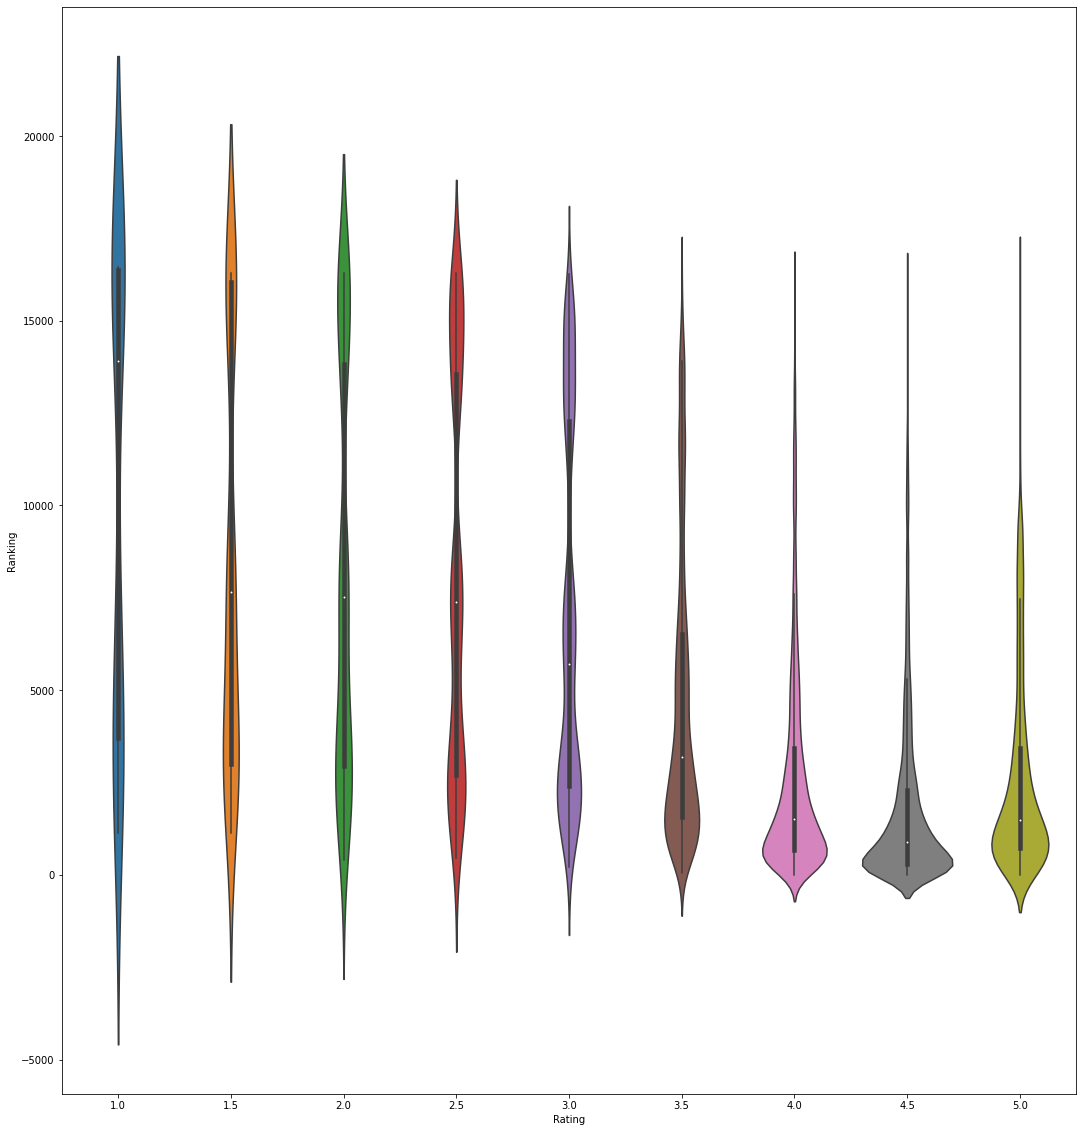

In [0]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(40, 20))

plt.subplot(1,2,1)
sns.violinplot(x = 'Rating', y = 'Ranking', data = df[0:] , )

plt.show()

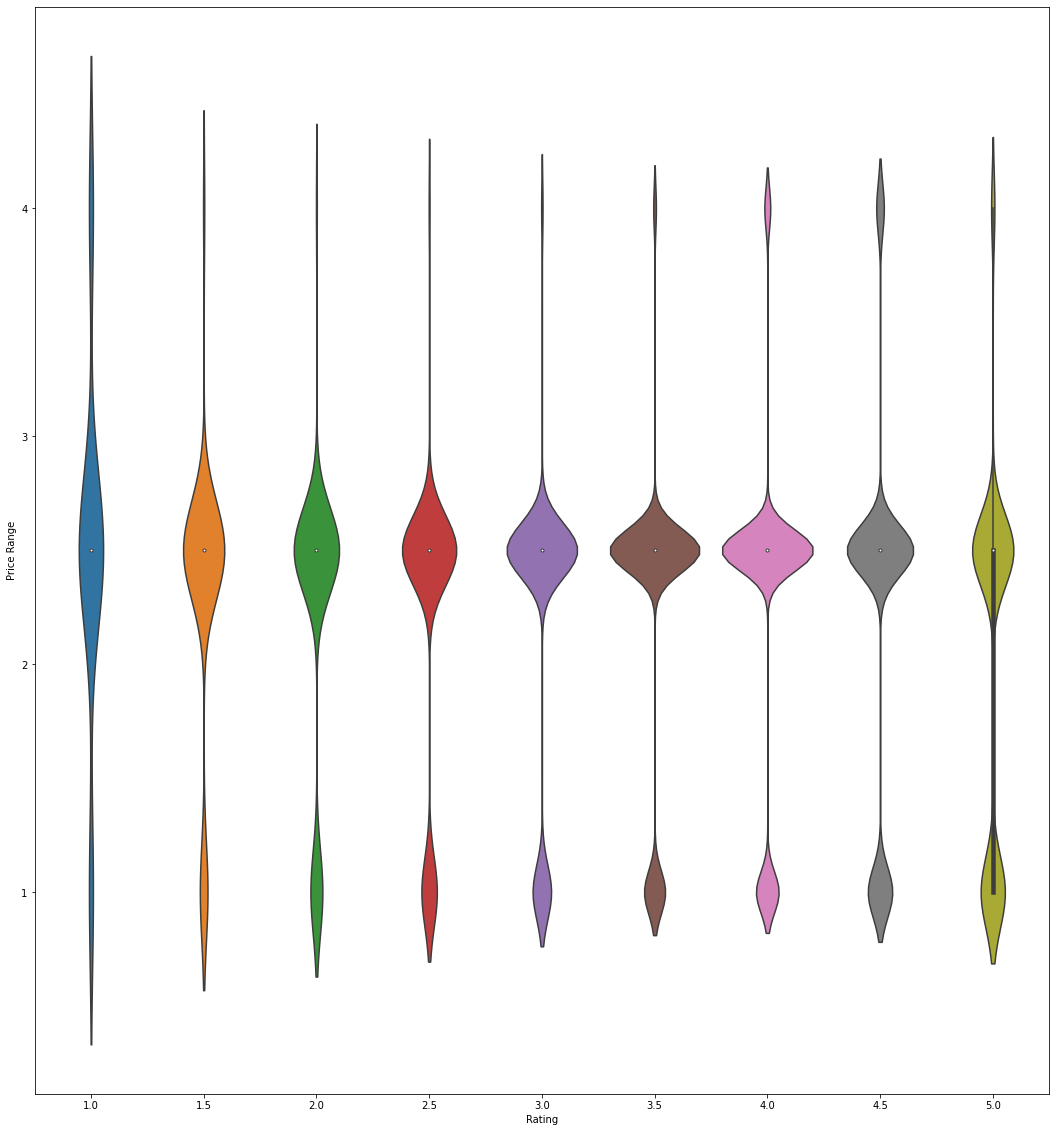

In [0]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(40, 20))

plt.subplot(1,2,1)
sns.violinplot(x = 'Rating', y = 'Price Range', data = df[0:] , )

plt.show()

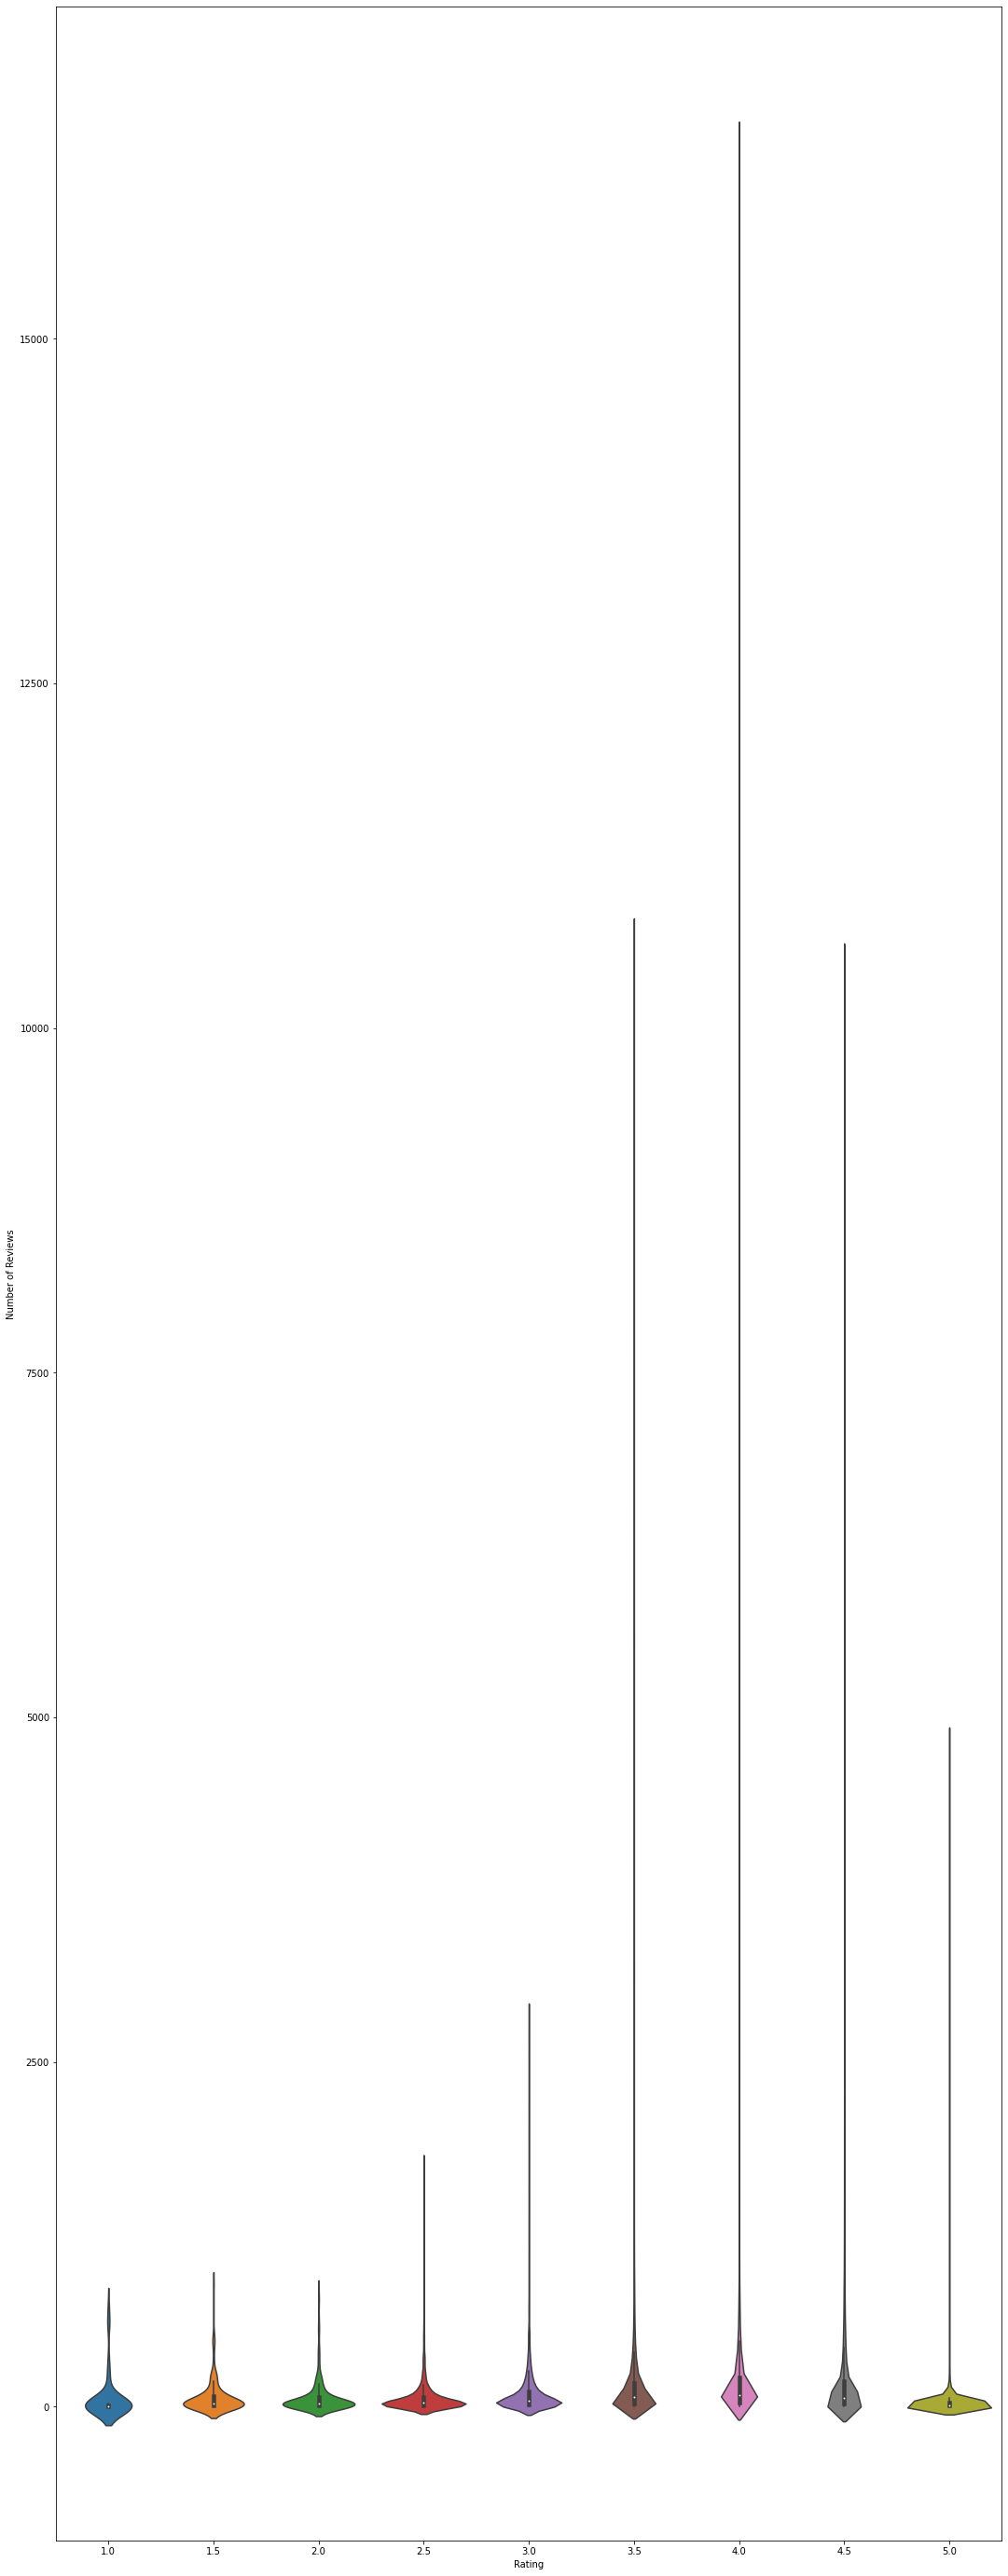

In [0]:
plt.figure(figsize=(40, 50))

plt.subplot(1,2,1)
sns.violinplot(x = 'Rating', y = 'Number of Reviews', data = df[0:] , )

plt.show()

In [0]:
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170
...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767


In [0]:
from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['Number of Reviews', 'Ranking',"Price Range"]])
y = dfp_subsampled['Rating'].values

In [0]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.005876
[t-SNE] Computed conditional probabilities in 0.403s
[t-SNE] Iteration 50: error = 78.4979401, gradient norm = 0.0285462 (50 iterations in 2.042s)
[t-SNE] Iteration 100: error = 66.3124542, gradient norm = 0.0113043 (50 iterations in 1.458s)
[t-SNE] Iteration 150: error = 62.9129562, gradient norm = 0.0063189 (50 iterations in 1.407s)
[t-SNE] Iteration 200: error = 61.0848770, gradient norm = 0.0063918 (50 iterations in 1.390s)
[t-SNE] Iteration 250: error = 59.8799744, gradient norm = 0.0042404

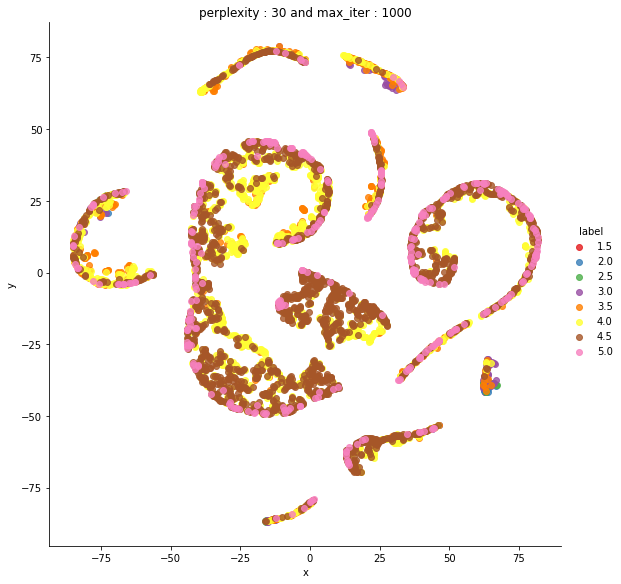

In [0]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1")
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [0]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.005876
[t-SNE] Computed conditional probabilities in 0.551s
[t-SNE] Iteration 50: error = 78.5689926, gradient norm = 0.0320827 (50 iterations in 8.856s)
[t-SNE] Iteration 100: error = 62.7716370, gradient norm = 0.0043904 (50 iterations in 4.518s)
[t-SNE] Iteration 150: error = 59.8522034, gradient norm = 0.0025354 (50 iterations in 4.397s)
[t-SNE] Iteration 200: error = 58.5315933, gradient norm = 0.0018274 (50 iterations in 4.363s)
[t-SNE] Iteration 250: error = 57.7687531, gradient norm = 0.0015262

In [0]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [0]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [0]:
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170
...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767


In [0]:
df=res

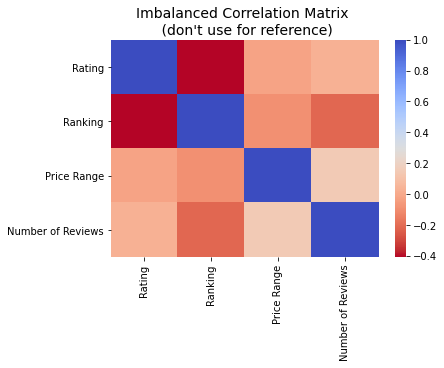

In [0]:

# Entire DataFrame
corr = df.loc[:,["Rating","Ranking","Price Range","Number of Reviews"]].corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


plt.show()

## Depend on Ranking Largely

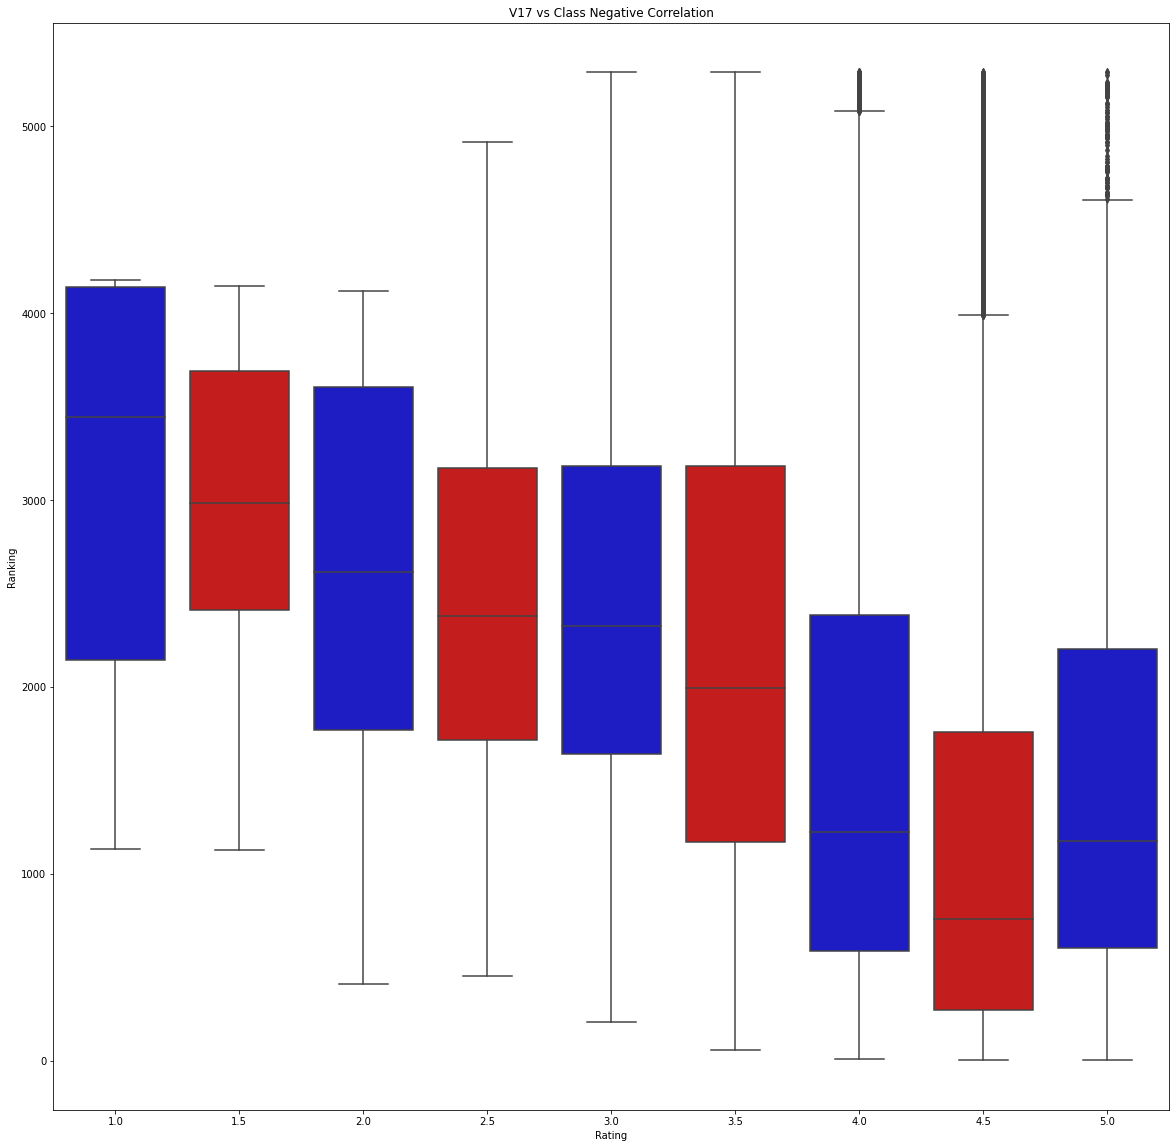

In [0]:
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(20, 20))
sns.boxplot(x="Rating", y="Ranking", data=df.loc[:,["Rating","Ranking","Price Range","Number of Reviews"]], palette=colors)
plt.title('V17 vs Class Negative Correlation')
plt.show()

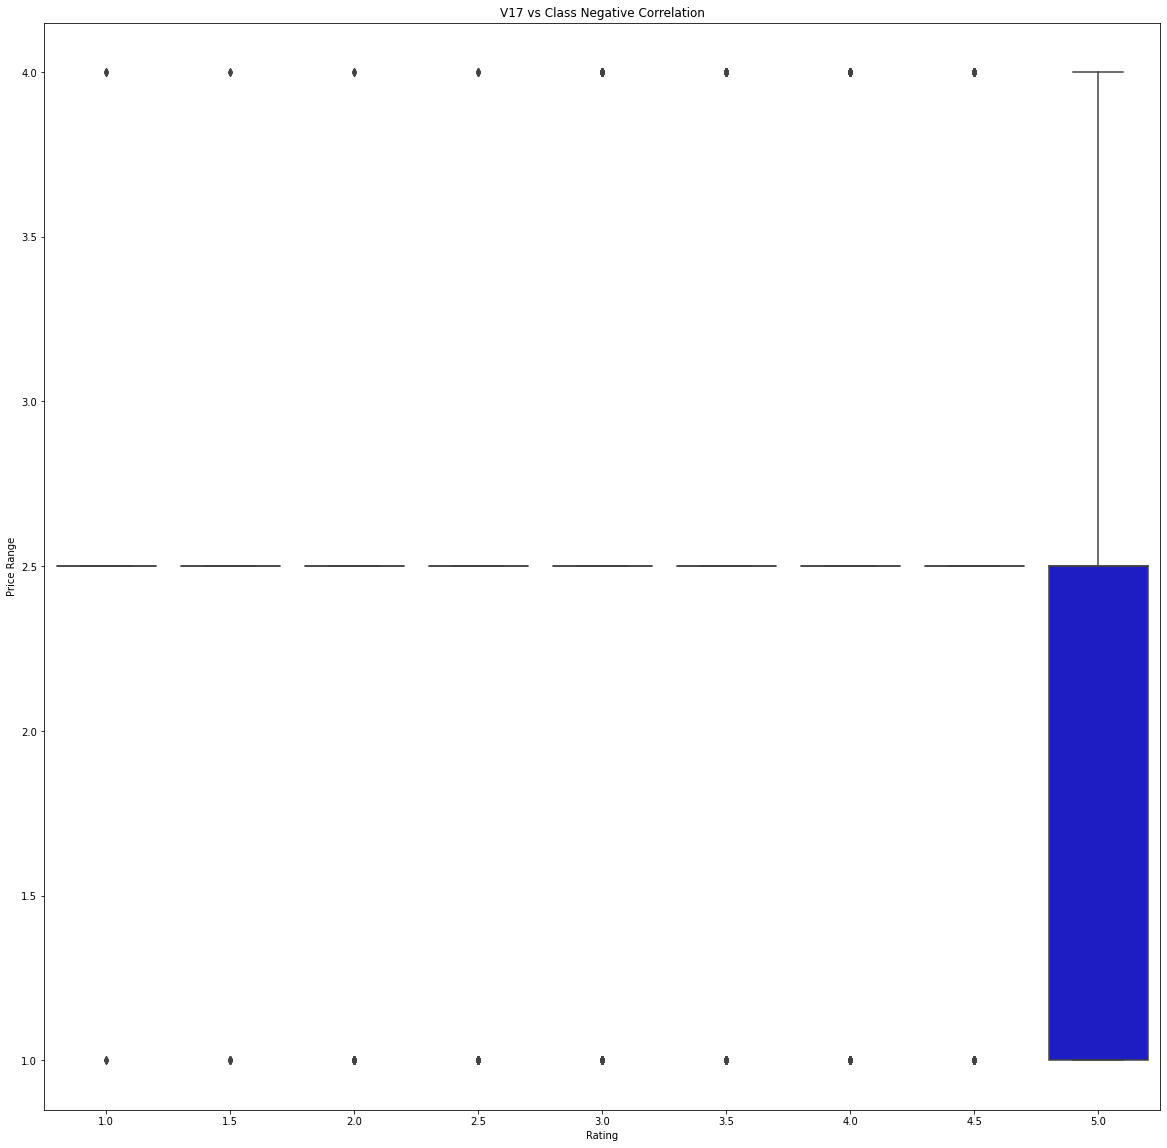

In [0]:
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(20, 20))
sns.boxplot(x="Rating", y="Price Range", data=df.loc[:,["Rating","Ranking","Price Range","Number of Reviews"]], palette=colors)
plt.title('V17 vs Class Negative Correlation')
plt.show()

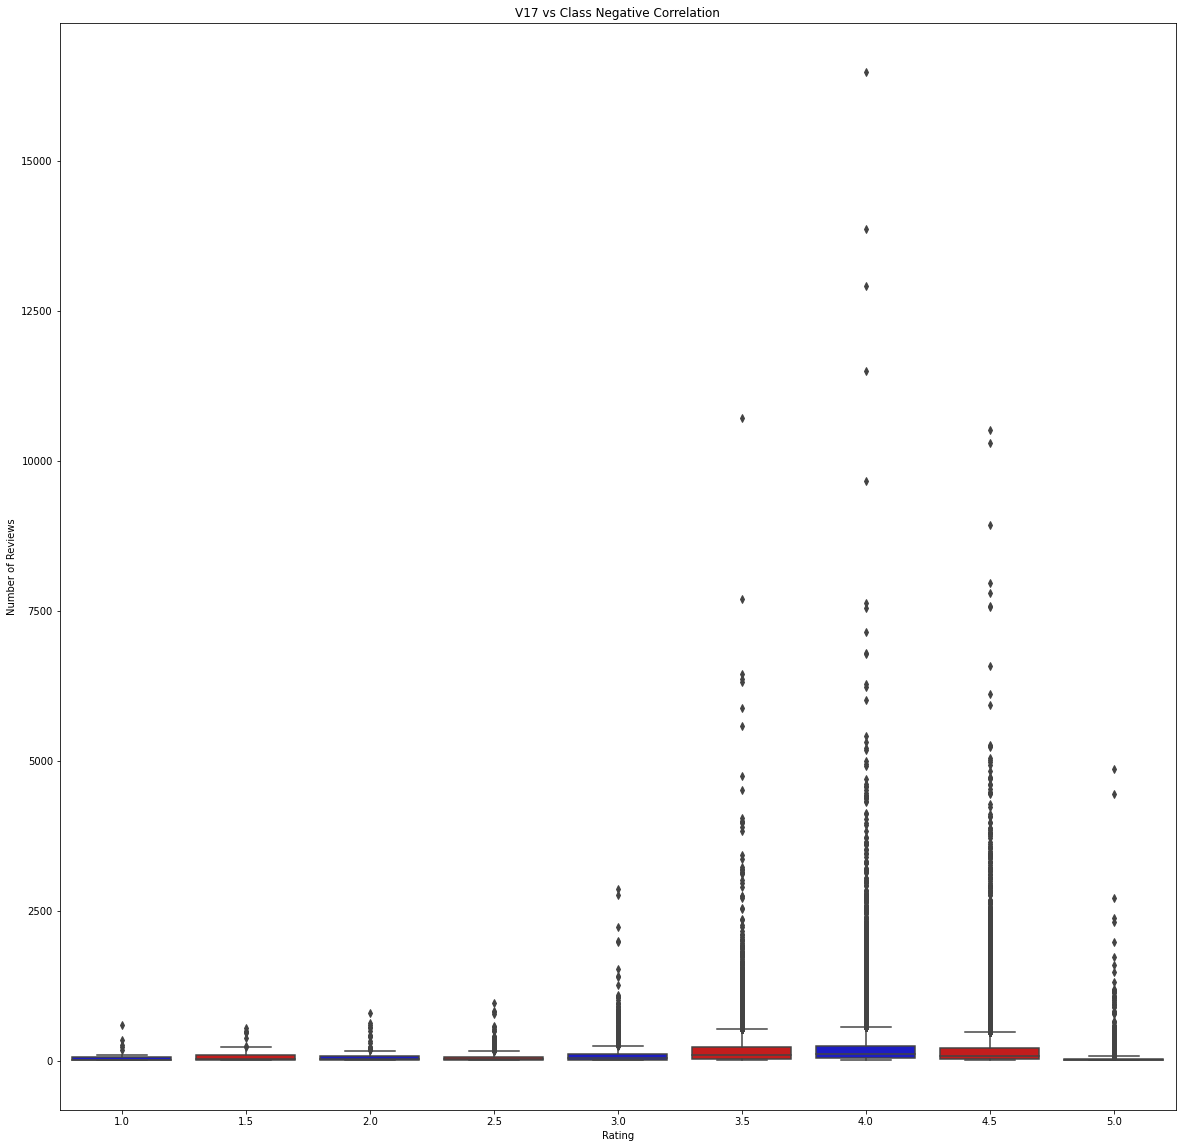

In [0]:
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(20, 20))
sns.boxplot(x="Rating", y="Number of Reviews", data=df.loc[:,["Rating","Ranking","Price Range","Number of Reviews"]], palette=colors)
plt.title('V17 vs Class Negative Correlation')
plt.show()

# Anamoly

In [0]:
v14_fraud = df['Ranking'].loc[df['Rating'] == 4.5].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df =df.drop(df[(df['Ranking'] > v14_upper) | (df['Ranking'] < v14_lower)].index)
print('----' * 44)


Quartile 25: 271.0 | Quartile 75: 1758.0
iqr: 1487.0
Cut Off: 2230.5
V14 Lower: -1959.5
V14 Upper: 3988.5
Feature V14 Outliers for Fraud Cases: 1207
V10 outliers:[3999.0, 4031.0, 4032.0, 4033.0, 4041.0, 4052.0, 4055.0, 4059.0, 4062.0, 4072.0, 4371.0, 4372.0, 4378.0, 4380.0, 4383.0, 4385.0, 4388.0, 4395.0, 4397.0, 4409.0, 4412.0, 4429.0, 4438.0, 4443.0, 4445.0, 4452.0, 4455.0, 4456.0, 4464.0, 4466.0, 4490.0, 4509.0, 4513.0, 4524.0, 4527.0, 4534.0, 4535.0, 4537.0, 4542.0, 4547.0, 4555.0, 4559.0, 4571.0, 4586.0, 4592.0, 4603.0, 4608.0, 4624.0, 4627.0, 4638.0, 4643.0, 4646.0, 4647.0, 4660.0, 4679.0, 4684.0, 4686.0, 4690.0, 4705.0, 4708.0, 4713.0, 4716.0, 4722.0, 4726.0, 4728.0, 4732.0, 4733.0, 4734.0, 4738.0, 4747.0, 4749.0, 4759.0, 4773.0, 4777.0, 4779.0, 4789.0, 4790.0, 4798.0, 4808.0, 4816.0, 4839.0, 4842.0, 4845.0, 4848.0, 4849.0, 4853.0, 4860.0, 4861.0, 4865.0, 4868.0, 4872.0, 4876.0, 4880.0, 4882.0, 4883.0, 4890.0, 4891.0, 4898.0, 4901.0, 4923.0, 4938.0, 4944.0, 4949.0, 4975.0, 4981.

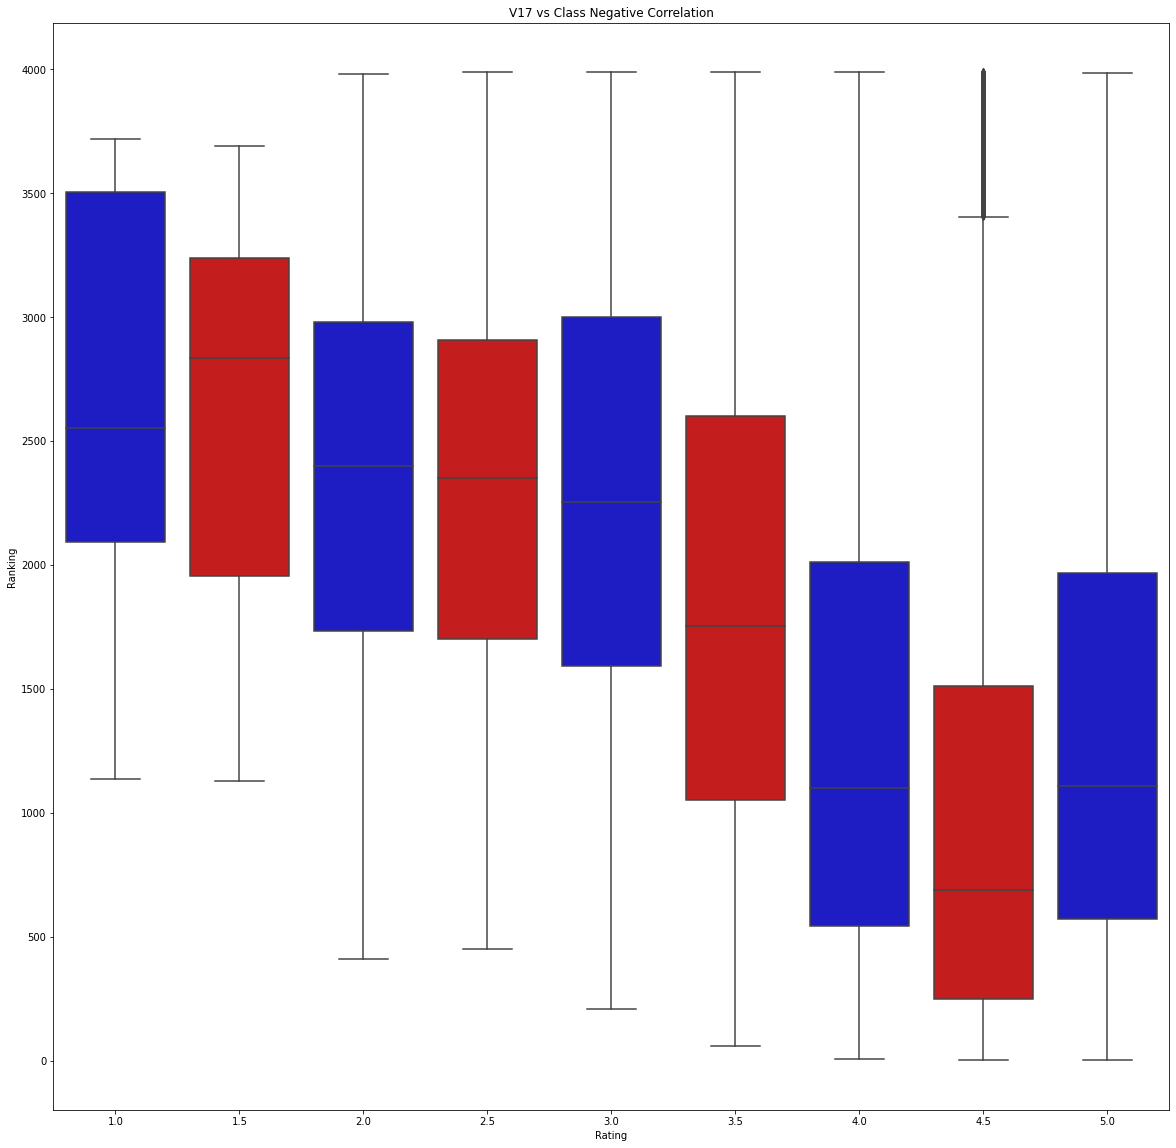

In [0]:
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize=(20, 20))
sns.boxplot(x="Rating", y="Ranking", data=df.loc[:,["Rating","Ranking","Price Range","Number of Reviews"]], palette=colors)
plt.title('V17 vs Class Negative Correlation')
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['Reviews']) + list(df['Cuisine Style'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
import en_core_web_sm

nlp = en_core_web_sm.load()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['Reviews'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['rev'] = list(vecs1)

100%|██████████| 78006/78006 [11:48<00:00, 110.05it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(df['Cuisine Style'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['cs'] = list(vecs2)

100%|██████████| 78006/78006 [10:55<00:00, 119.06it/s]


In [0]:
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA,rev,cs
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080,"[11.777536869049072, -33.10498768091202, 1.750...","[4.730093836784363, -40.73257064819336, -1.643..."
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419,"[-8.92596273124218, -19.01333975791931, -26.81...","[-0.6253483295440674, -68.19238789379597, -30...."
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959,"[61.66789531707764, -62.38125205039978, 5.8188...","[28.39041244983673, -73.21053862571716, -12.60..."
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229,"[48.76784157752991, -48.86361300945282, -7.213...","[9.057648360729218, -98.40478536486626, -24.57..."
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170,"[-18.095963664352894, -29.178393721580505, -10...","[23.852954149246216, -106.10490295290947, -33...."
...,...,...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890,"[52.879052340984344, -54.116103291511536, 63.1...","[0.30908501148223877, -8.179335355758667, -12...."
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360,"[22.09816735982895, -8.491314888000488, -11.88...","[3.872749447822571, -35.871439933776855, 2.296..."
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558,"[11.377395153045654, -2.1784799098968506, 0.89...","[13.226749539375305, -37.086705446243286, 25.1..."
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767,"[9.264357089996338, -73.33839440345764, 22.958...","[5.680281758308411, -17.7868013381958, -4.5680..."


In [0]:
df.columns


Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'ID_TA', 'rev', 'cs'],
      dtype='object')

In [0]:
df3 = df.drop(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'ID_TA'],axis=1)

In [0]:
df3

,rev,cs
0,"[11.777536869049072, -33.10498768091202, 1.750...","[4.730093836784363, -40.73257064819336, -1.643..."
1,"[-8.92596273124218, -19.01333975791931, -26.81...","[-0.6253483295440674, -68.19238789379597, -30...."
2,"[61.66789531707764, -62.38125205039978, 5.8188...","[28.39041244983673, -73.21053862571716, -12.60..."
3,"[48.76784157752991, -48.86361300945282, -7.213...","[9.057648360729218, -98.40478536486626, -24.57..."
4,"[-18.095963664352894, -29.178393721580505, -10...","[23.852954149246216, -106.10490295290947, -33...."
...,...,...
125440,"[52.879052340984344, -54.116103291511536, 63.1...","[0.30908501148223877, -8.179335355758667, -12...."
125441,"[22.09816735982895, -8.491314888000488, -11.88...","[3.872749447822571, -35.871439933776855, 2.296..."
125443,"[11.377395153045654, -2.1784799098968506, 0.89...","[13.226749539375305, -37.086705446243286, 25.1..."
125445,"[9.264357089996338, -73.33839440345764, 22.958...","[5.680281758308411, -17.7868013381958, -4.5680..."


In [0]:
df3_q1 = pd.DataFrame(df3.rev.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.cs.values.tolist(), index= df3.index)

In [0]:
df3_q1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,11.777537,-33.104988,1.750928,-2.403883,123.210826,126.156542,46.516413,24.039058,96.999226,157.119891,55.044885,-40.830108,125.351593,-38.957320,9.453428,60.614056,-34.185001,11.791398,-101.261812,-33.546062,50.071802,20.754510,-55.738465,-50.344172,-12.316940,-8.641695,22.437466,-32.584829,100.039083,-63.480687,20.733587,0.042315,-2.335294,-49.815418,5.904805,-34.443860,185.399332,-130.520946,-82.196413,-66.254483,...,45.339194,94.479946,0.263865,-63.798693,90.865735,-89.168859,51.841945,-68.476248,48.223495,-13.072272,44.856652,-59.823944,21.873257,36.013784,-9.645341,60.672218,45.915764,20.608976,-62.754599,-48.367374,101.972980,88.854056,-38.677726,84.483814,-4.264508,-147.487496,25.122114,10.588634,62.201231,9.733861,-65.606076,-45.693351,24.352149,7.675753,-13.560795,-70.136484,-53.345294,74.824507,-5.149073,20.805151
1,-8.925963,-19.013340,-26.810258,-17.985258,35.959316,16.790143,22.315591,65.990933,3.299149,33.512501,-8.996798,40.487304,-3.237063,-26.872078,-12.760441,45.213430,-16.092803,6.503277,-46.848392,-26.861324,-1.458920,36.242997,-36.069801,-18.617838,-29.947709,22.718488,-4.106877,-10.521687,49.355247,-53.571581,10.734092,-1.377377,29.316759,-20.680237,-9.771690,-52.650613,34.629750,-22.342661,-44.676991,19.041835,...,10.818534,85.002536,30.453635,-0.017445,30.039489,-48.317766,27.409980,3.364069,64.082195,-39.917010,-16.774797,-21.309295,28.038059,20.846036,-21.238702,-15.312270,5.163147,20.658756,6.217398,-26.285396,19.438356,7.918242,-3.599486,9.073509,7.332303,-54.647962,3.221425,-3.508876,-1.657872,1.458480,35.825039,11.085956,19.946253,19.673202,-24.710820,9.647034,-30.374988,59.308125,16.262483,-9.796449
2,61.667895,-62.381252,5.818874,58.017186,105.973235,-29.080484,39.802654,-17.023379,3.864421,53.716306,31.848314,68.861033,-12.681923,-62.459828,-44.214865,-51.872337,-14.191041,27.961206,-51.829499,-46.043650,72.496510,-26.241969,-21.551147,28.215894,-59.019799,-23.795249,-33.694755,-63.087407,146.143433,-33.804234,-2.699848,-20.382959,60.879895,-14.993349,-1.290977,-74.201294,60.061985,-58.657081,-67.529049,-9.675006,...,17.117269,67.232550,15.302975,-9.329179,4.426295,-16.233108,16.901345,54.832726,44.257473,1.268453,37.771631,-78.338383,-35.128095,107.353744,-10.122610,-18.744441,33.536280,38.856571,-75.819434,-57.530294,52.098937,-9.699139,-23.028010,23.225668,36.046919,-123.492950,-28.576295,-21.635367,72.375539,41.987841,-1.328838,-61.078986,10.090728,-8.849865,11.499162,3.072537,18.097512,87.111814,62.215974,22.431571
3,48.767842,-48.863613,-7.213205,151.958111,126.116573,33.908058,8.475404,36.064222,115.605462,60.865862,48.130188,73.296208,-12.467051,-77.358961,-61.460830,2.455529,-60.158668,19.004992,-122.903200,-0.623347,86.204471,-49.516415,-8.806679,64.081951,-98.275125,46.690413,-72.728795,-152.930763,159.096283,-94.492490,-15.904269,41.377227,76.832657,-163.375916,-20.748489,-137.585604,114.648353,-165.791728,-106.205791,-59.499085,...,88.312491,136.644976,23.296345,-23.689525,73.733869,-108.760335,117.030227,3.242025,154.066417,-45.706519,129.914917,-111.976456,-89.540014,159.470097,9.176989,-148.079127,31.999568,124.431036,-31.835012,-100.165056,99.468801,-19.686777,22.535704,70.669702,101.664667,-107.960711,16.837347,8.549380,77.139546,-28.585025,-40.839957,-40.258805,-27.210893,-3.946215,14.528774,-64.436622,-23.438227,117.007636,124.083817,65.331408
4,-18.095964,-29.178394,-10.607319,16.921035,59.970702,10.177545,-30.774745,71.637193,31.675330,80.205178,36.716170,-0.645760,62.815739,-32.615642,1.329221,29.055282,-10.441609,-12.424177,-50.257521,2.312518,-10.433536,-13.936090,-19.428017,15.686711,-47.490542,-1.113917,-1.404250,-34.836200,36.245357,-70.064153,13.269589,3.351237,19.330991,-57.985332,-9.007873,-61.588272,26.108243,-69.919940,-60.49676

In [0]:
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA,rev,cs
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080,"[11.777536869049072, -33.10498768091202, 1.750...","[4.730093836784363, -40.73257064819336, -1.643..."
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419,"[-8.92596273124218, -19.01333975791931, -26.81...","[-0.6253483295440674, -68.19238789379597, -30...."
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959,"[61.66789531707764, -62.38125205039978, 5.8188...","[28.39041244983673, -73.21053862571716, -12.60..."
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229,"[48.76784157752991, -48.86361300945282, -7.213...","[9.057648360729218, -98.40478536486626, -24.57..."
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170,"[-18.095963664352894, -29.178393721580505, -10...","[23.852954149246216, -106.10490295290947, -33...."
...,...,...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890,"[52.879052340984344, -54.116103291511536, 63.1...","[0.30908501148223877, -8.179335355758667, -12...."
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360,"[22.09816735982895, -8.491314888000488, -11.88...","[3.872749447822571, -35.871439933776855, 2.296..."
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558,"[11.377395153045654, -2.1784799098968506, 0.89...","[13.226749539375305, -37.086705446243286, 25.1..."
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767,"[9.264357089996338, -73.33839440345764, 22.958...","[5.680281758308411, -17.7868013381958, -4.5680..."


In [0]:
df1 = df.drop(["rev","cs"],axis=1)

In [0]:
df1

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,ID_TA
0,0,Martine of Martine's Table,Amsterdam,french dutch european,1.0,5.0,2.5,136.0,just like home a warm welcome to wintry ams...,d11752080
1,1,De Silveren Spiegel,Amsterdam,dutch european havegetarian friendly ...,2.0,4.5,4.0,812.0,great food and staff just perfect,d693419
2,2,La Rive,Amsterdam,mediterranean french international eu...,3.0,4.5,4.0,567.0,ownatisfaction delicious old school restaur...,d696959
3,3,Vinkeles,Amsterdam,french european international contemp...,4.0,5.0,4.0,564.0,true five star dinner a superb evening of f...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,dutch european international havegeta...,5.0,4.5,4.0,316.0,best meal ever ownuper food experience ...,d6864170
...,...,...,...,...,...,...,...,...,...,...
125440,1580,Pizza-Blitz Zurich-Oerlikon,Zurich,italian pizza,1586.0,2.5,2.5,16.0,good service 38 usd for a pizza horrible ...,d2222890
125441,1581,Restaurant Wehrlischloss,Zurich,ownteakhouse ownwiss european,1587.0,2.0,2.5,8.0,havery basic,d8462360
125443,1583,Swiss Food Delivery,Zurich,italian chinese american indian th...,1589.0,2.5,2.5,3.0,good service,d8287558
125445,1585,Ristorante La Taverna,Zurich,italian havegetarian friendly,1591.0,4.5,2.5,16.0,ownuper local eatery ownmall and charming p...,d5768767


In [0]:
# storing the final features to csv file
import os
if not os.path.isfile('/content/drive/My Drive/Colab Notebooks/RestaurantRatings/final_features.csv'):
    df3_q1['ID_TA']=df1['ID_TA']
    df3_q2['ID_TA']=df1['ID_TA']
  
    df2  = df3_q1.merge(df3_q2, on='ID_TA',how='left')
    result  = df1.merge(df2, on='ID_TA',how='left')
    result.to_csv('/content/drive/My Drive/Colab Notebooks/RestaurantRatings/final_features.csv')

In [0]:
result=pd.read_csv('/content/drive/My Drive/Colab Notebooks/RestaurantRatings/final_features.csv')


In [0]:
result = result.drop(['Unnamed: 0.1', 'Cuisine Style', 'Reviews'],axis=1)

In [0]:
result

,Unnamed: 0,Name,City,Ranking,Rating,Price Range,Number of Reviews,ID_TA,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,Martine of Martine's Table,Amsterdam,1.0,5.0,2.5,136.0,d11752080,11.777537,-33.104988,1.750928,-2.403883,123.210826,126.156542,46.516413,24.039058,96.999226,157.119891,55.044885,-40.830108,125.351593,-38.957320,9.453428,60.614056,-34.185001,11.791398,-101.261812,-33.546062,50.071802,20.754510,-55.738465,-50.344172,-12.316940,-8.641695,22.437466,-32.584829,100.039083,-63.480687,20.733587,0.042315,...,1.813918,44.441586,1.149034,-11.023823,7.292255,5.219045,25.463288,23.480221,43.263071,0.612931,48.136861,1.749651,0.275683,-4.217204,-3.707761,-19.017394,-4.085642,8.755226,20.299433,-31.395379,2.211190,-10.424957,-6.281065,60.113095,17.205369,-25.130815,-26.417810,-14.036110,2.034804,16.449422,17.788070,-22.310166,-5.885745,-11.007430,6.466809,-1.977821,5.713768,17.483489,-6.087014,16.133014
1,1,De Silveren Spiegel,Amsterdam,2.0,4.5,4.0,812.0,d693419,-8.925963,-19.013340,-26.810258,-17.985258,35.959316,16.790143,22.315591,65.990933,3.299149,33.512501,-8.996798,40.487304,-3.237063,-26.872078,-12.760441,45.213430,-16.092803,6.503277,-46.848392,-26.861324,-1.458920,36.242997,-36.069801,-18.617838,-29.947709,22.718488,-4.106877,-10.521687,49.355247,-53.571581,10.734092,-1.377377,...,18.237318,47.579906,-0.481212,-10.870086,9.369827,-19.918908,23.658296,14.844763,54.756251,-1.377257,71.667241,-9.172336,35.125399,10.400002,-3.201250,-33.671178,13.629331,1.365654,-7.382932,-36.609050,14.700886,-23.680770,-7.787405,82.333377,28.207112,-34.551681,-29.025491,-12.873963,7.436589,23.650551,-2.665448,-26.318680,-4.238894,-9.368964,26.867660,-2.386264,20.340411,3.553340,8.438831,58.939936
2,2,La Rive,Amsterdam,3.0,4.5,4.0,567.0,d696959,61.667895,-62.381252,5.818874,58.017186,105.973235,-29.080484,39.802654,-17.023379,3.864421,53.716306,31.848314,68.861033,-12.681923,-62.459828,-44.214865,-51.872337,-14.191041,27.961206,-51.829499,-46.043650,72.496510,-26.241969,-21.551147,28.215894,-59.019799,-23.795249,-33.694755,-63.087407,146.143433,-33.804234,-2.699848,-20.382959,...,28.277543,78.463966,-8.493462,-29.128661,-6.138144,2.142487,33.477105,23.926227,82.990610,27.666941,75.971931,-3.697427,-7.762441,3.609674,19.996815,-38.412065,23.672955,25.484543,29.942146,-74.777292,7.643501,-20.327469,-0.977211,63.469118,21.558815,-34.173000,-29.380344,-10.403876,29.333451,57.137460,18.696795,-53.356735,4.531202,-19.798504,4.768966,13.733218,30.312393,27.552122,-10.475188,55.559728
3,3,Vinkeles,Amsterdam,4.0,5.0,4.0,564.0,d1239229,48.767842,-48.863613,-7.213205,151.958111,126.116573,33.908058,8.475404,36.064222,115.605462,60.865862,48.130188,73.296208,-12.467051,-77.358961,-61.460830,2.455529,-60.158668,19.004992,-122.903200,-0.623347,86.204471,-49.516415,-8.806679,64.081951,-98.275125,46.690413,-72.728795,-152.930763,159.096283,-94.492490,-15.904269,41.377227,...,39.188123,114.513545,-20.405005,-32.873686,9.229362,1.162703,53.469571,19.279486,119.744779,38.543396,113.628905,-17.972349,3.822863,15.286812,4.945057,-48.829293,34.787490,17.768419,-0.956473,-73.397314,16.141081,-20.070860,9.330480,83.706379,37.950715,-55.470412,-38.473546,-15.945988,-3.658977,71.975662,15.375071,-58.486927,10.586111,-18.963193,11.429454,11.000769,16.018012,33.124353,5.540451,84.353493
4,4,Librije's Zusje Amsterdam,Amsterdam,5.0,4.5,4.0,316.0,d6864170,-18.095964,-29.178394,-10.607319,16.921035,59.970702,10.177545,-30.774745,71.637193,31.675330,80.205178,36.716170,-0.645760,62.815739,-32.615642,1.329221,29.055282,-10.441609,-12.424177,-50.257521,2.312518,-10.433536,-13.936090,-19.428017,15.686711,-47.490542,-1.113917,-1.404250,-34.836200,36.245357,-70.06415

In [0]:
result["City"].value_counts()

London        13053
Paris          9468
Barcelona      5188
Madrid         4830
Rome           4290
Berlin         3774
Milan          3619
Prague         2963
Amsterdam      2610
Lisbon         2521
Vienna         2202
Brussels       2101
Budapest       1806
Munich         1746
Dublin         1620
Stockholm      1561
Edinburgh      1525
Copenhagen     1403
Warsaw         1360
Athens         1280
Hamburg        1267
Lyon           1248
Zurich         1158
Geneva         1018
Oporto          995
Krakow          867
Helsinki        860
Oslo            837
Bratislava      511
Luxembourg      479
Ljubljana       362
Name: City, dtype: int64

In [0]:
g1 = result.groupby( [ "City"] ).Rating.mean()

In [0]:
g1

City
Amsterdam     4.126054
Athens        4.229687
Barcelona     4.004915
Berlin        4.142157
Bratislava    4.061644
Brussels      3.892670
Budapest      4.097176
Copenhagen    4.001069
Dublin        4.068519
Edinburgh     4.065574
Geneva        3.965619
Hamburg       4.066693
Helsinki      3.922674
Krakow        4.174740
Lisbon        4.060889
Ljubljana     4.092541
London        3.955106
Luxembourg    3.924843
Lyon          3.954327
Madrid        3.882816
Milan         3.843327
Munich        4.029496
Oporto        4.136683
Oslo          3.900239
Paris         3.963456
Prague        4.032737
Rome          4.131585
Stockholm     3.891416
Vienna        4.049500
Warsaw        4.068382
Zurich        4.016839
Name: Rating, dtype: float64

In [0]:
'result=result.sample(30000)'
X= result.drop(['Unnamed: 0', 'Name', 'City', 'Rating'],axis=1)


In [0]:
result["Rating"].value_counts()

4.0    29577
4.5    23401
3.5    14520
3.0     4622
5.0     4260
2.5     1415
2.0      500
1.5      170
1.0       57
Name: Rating, dtype: int64

In [0]:
X=X.drop(["ID_TA"],axis=1)

In [0]:
X

,Ranking,Price Range,Number of Reviews,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1.0,2.5,136.0,11.777537,-33.104988,1.750928,-2.403883,123.210826,126.156542,46.516413,24.039058,96.999226,157.119891,55.044885,-40.830108,125.351593,-38.957320,9.453428,60.614056,-34.185001,11.791398,-101.261812,-33.546062,50.071802,20.754510,-55.738465,-50.344172,-12.316940,-8.641695,22.437466,-32.584829,100.039083,-63.480687,20.733587,0.042315,-2.335294,-49.815418,5.904805,-34.443860,185.399332,...,1.813918,44.441586,1.149034,-11.023823,7.292255,5.219045,25.463288,23.480221,43.263071,0.612931,48.136861,1.749651,0.275683,-4.217204,-3.707761,-19.017394,-4.085642,8.755226,20.299433,-31.395379,2.211190,-10.424957,-6.281065,60.113095,17.205369,-25.130815,-26.417810,-14.036110,2.034804,16.449422,17.788070,-22.310166,-5.885745,-11.007430,6.466809,-1.977821,5.713768,17.483489,-6.087014,16.133014
1,2.0,4.0,812.0,-8.925963,-19.013340,-26.810258,-17.985258,35.959316,16.790143,22.315591,65.990933,3.299149,33.512501,-8.996798,40.487304,-3.237063,-26.872078,-12.760441,45.213430,-16.092803,6.503277,-46.848392,-26.861324,-1.458920,36.242997,-36.069801,-18.617838,-29.947709,22.718488,-4.106877,-10.521687,49.355247,-53.571581,10.734092,-1.377377,29.316759,-20.680237,-9.771690,-52.650613,34.629750,...,18.237318,47.579906,-0.481212,-10.870086,9.369827,-19.918908,23.658296,14.844763,54.756251,-1.377257,71.667241,-9.172336,35.125399,10.400002,-3.201250,-33.671178,13.629331,1.365654,-7.382932,-36.609050,14.700886,-23.680770,-7.787405,82.333377,28.207112,-34.551681,-29.025491,-12.873963,7.436589,23.650551,-2.665448,-26.318680,-4.238894,-9.368964,26.867660,-2.386264,20.340411,3.553340,8.438831,58.939936
2,3.0,4.0,567.0,61.667895,-62.381252,5.818874,58.017186,105.973235,-29.080484,39.802654,-17.023379,3.864421,53.716306,31.848314,68.861033,-12.681923,-62.459828,-44.214865,-51.872337,-14.191041,27.961206,-51.829499,-46.043650,72.496510,-26.241969,-21.551147,28.215894,-59.019799,-23.795249,-33.694755,-63.087407,146.143433,-33.804234,-2.699848,-20.382959,60.879895,-14.993349,-1.290977,-74.201294,60.061985,...,28.277543,78.463966,-8.493462,-29.128661,-6.138144,2.142487,33.477105,23.926227,82.990610,27.666941,75.971931,-3.697427,-7.762441,3.609674,19.996815,-38.412065,23.672955,25.484543,29.942146,-74.777292,7.643501,-20.327469,-0.977211,63.469118,21.558815,-34.173000,-29.380344,-10.403876,29.333451,57.137460,18.696795,-53.356735,4.531202,-19.798504,4.768966,13.733218,30.312393,27.552122,-10.475188,55.559728
3,4.0,4.0,564.0,48.767842,-48.863613,-7.213205,151.958111,126.116573,33.908058,8.475404,36.064222,115.605462,60.865862,48.130188,73.296208,-12.467051,-77.358961,-61.460830,2.455529,-60.158668,19.004992,-122.903200,-0.623347,86.204471,-49.516415,-8.806679,64.081951,-98.275125,46.690413,-72.728795,-152.930763,159.096283,-94.492490,-15.904269,41.377227,76.832657,-163.375916,-20.748489,-137.585604,114.648353,...,39.188123,114.513545,-20.405005,-32.873686,9.229362,1.162703,53.469571,19.279486,119.744779,38.543396,113.628905,-17.972349,3.822863,15.286812,4.945057,-48.829293,34.787490,17.768419,-0.956473,-73.397314,16.141081,-20.070860,9.330480,83.706379,37.950715,-55.470412,-38.473546,-15.945988,-3.658977,71.975662,15.375071,-58.486927,10.586111,-18.963193,11.429454,11.000769,16.018012,33.124353,5.540451,84.353493
4,5.0,4.0,316.0,-18.095964,-29.178394,-10.607319,16.921035,59.970702,10.177545,-30.774745,71.637193,31.675330,80.205178,36.716170,-0.645760,62.815739,-32.615642,1.329221,29.055282,-10.441609,-12.424177,-50.257521,2.312518,-10.433536,-13.936090,-19.428017,15.686711,-47.490542,-1.113917,-1.404250,-34.836200,36.245357,-70.064153,13.269589

In [0]:
y_true = result['Rating'].values


In [0]:
y_true

array([5. , 4.5, 4.5, ..., 2.5, 4.5, 2. ])

In [0]:
l=[]
for i in y_true:
  i=int(i*2)
  l.append(i)
y_true =l




In [0]:
y_true

[10,
 9,
 9,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 9,
 9,
 10,
 9,
 9,
 9,
 9,
 10,
 9,
 8,
 9,
 9,
 9,
 10,
 9,
 9,
 9,
 9,
 10,
 8,
 9,
 9,
 9,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 8,
 9,
 8,
 9,
 10,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 10,
 9,
 8,
 10,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 8,
 8,
 9,
 9,
 8,
 8,
 8,
 9,
 8,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 8,
 9,
 9,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 10,
 9,
 8,
 9,
 9,
 9,
 10,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 8,

In [0]:


X=X.fillna(0)

ALL THE CITIES HAVE ALMOST SIMILAR AVERAGE

In [0]:



# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [0]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:',X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 50253
Number of data points in test data: 15705
Number of data points in cross validation data: 12564


In [0]:
'''
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)'''



'\n# Oversample and plot imbalanced dataset with SMOTE\nfrom collections import Counter\nfrom sklearn.datasets import make_classification\nfrom imblearn.over_sampling import SMOTE\nfrom matplotlib import pyplot\nfrom numpy import where\n\noversample = SMOTE()\nX_train, y_train = oversample.fit_resample(X_train, y_train)'

In [0]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:',X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 50253
Number of data points in test data: 15705
Number of data points in cross validation data: 12564


In [0]:
import collections, numpy

a = numpy.array(y_train)
collections.Counter(a)

Counter({2: 37,
         3: 109,
         4: 320,
         5: 906,
         6: 2957,
         7: 9293,
         8: 18928,
         9: 14977,
         10: 2726})

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [2,3,4,5,6,7,8,9,10]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


Log loss on Cross Validation Data using Random Model 2.4950768541658106
Log loss on Test Data using Random Model 2.4916554714559487
-------------------- Confusion matrix --------------------


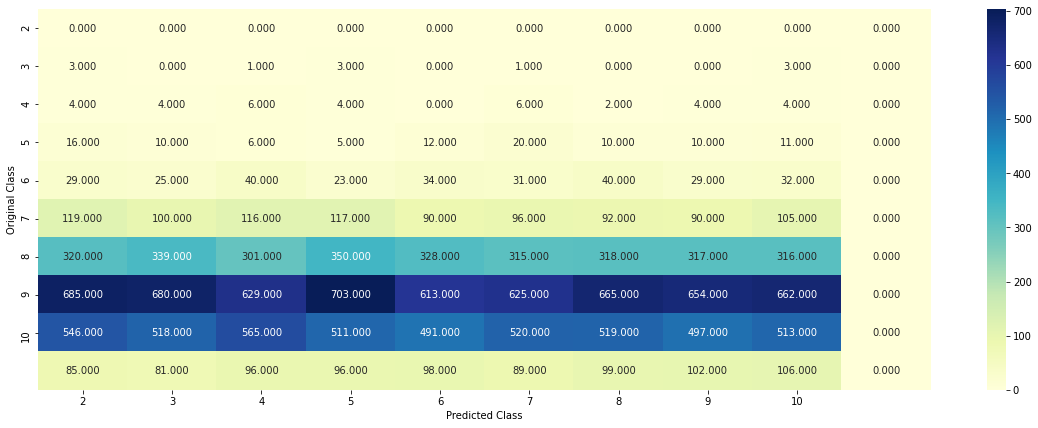

-------------------- Precision matrix (Columm Sum=1) --------------------


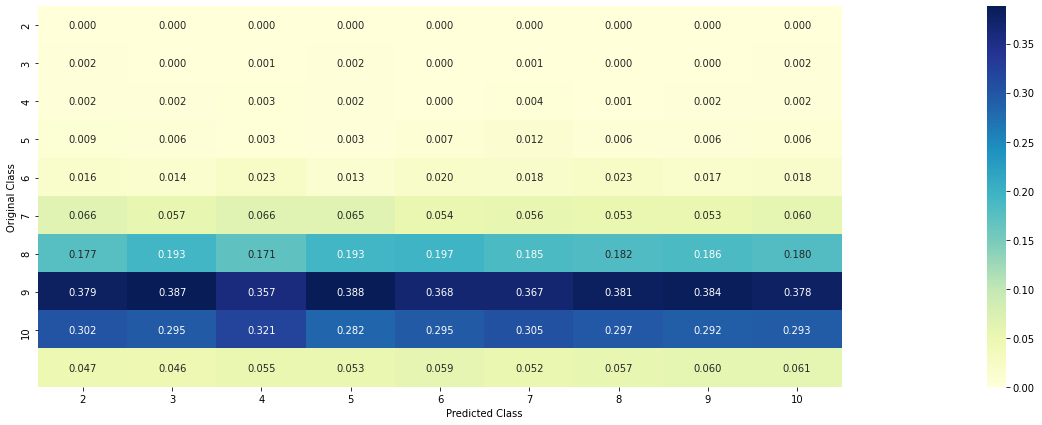

-------------------- Recall matrix (Row sum=1) --------------------


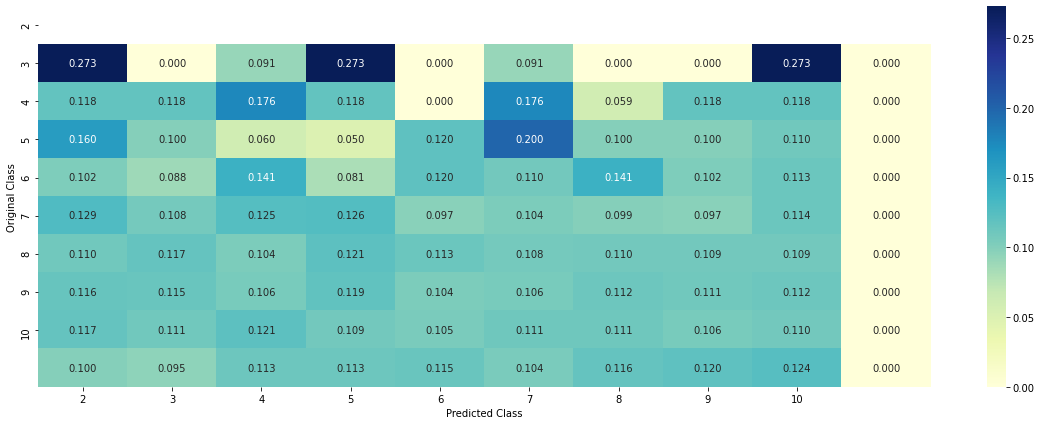

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))

for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/np.sum(rand_probs))[0])

print("Log loss on Cross Validation Data using Random Model",log_loss((y_cv),(cv_predicted_y), eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

for alpha = 5
Log Loss : 1.3509343136903524
for alpha = 11
Log Loss : 1.317341278549973
for alpha = 15
Log Loss : 1.3079972456419453
for alpha = 21
Log Loss : 1.298071403525624
for alpha = 31
Log Loss : 1.2883342397523885
for alpha = 41
Log Loss : 1.2828388802361625
for alpha = 51
Log Loss : 1.2796139266083646
for alpha = 99
Log Loss : 1.2788527841425212


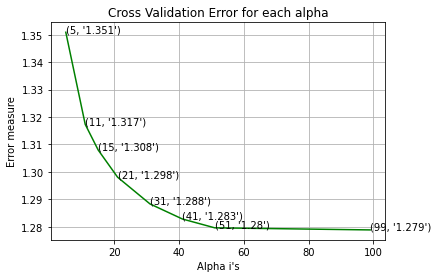

For values of best alpha =  99 The train log loss is: 1.2530673048314283
For values of best alpha =  99 The test log loss is: 1.272770000106425


In [0]:


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [0]:


#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/len(test_y))
    plot_confusion_matrix(test_y, pred_y)
    #best alpha=99

Log loss : 1.2788527841425212
Number of mis-classified points : 0.5344635466411971
-------------------- Confusion matrix --------------------


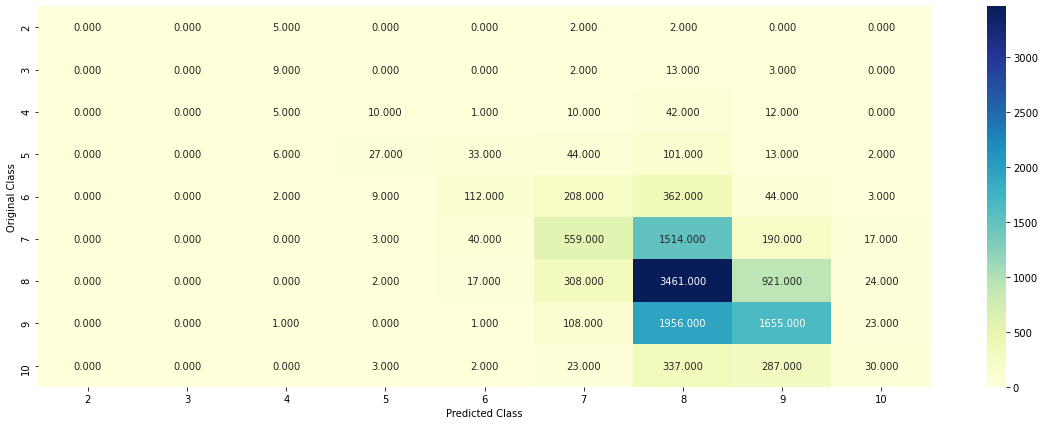

-------------------- Precision matrix (Columm Sum=1) --------------------


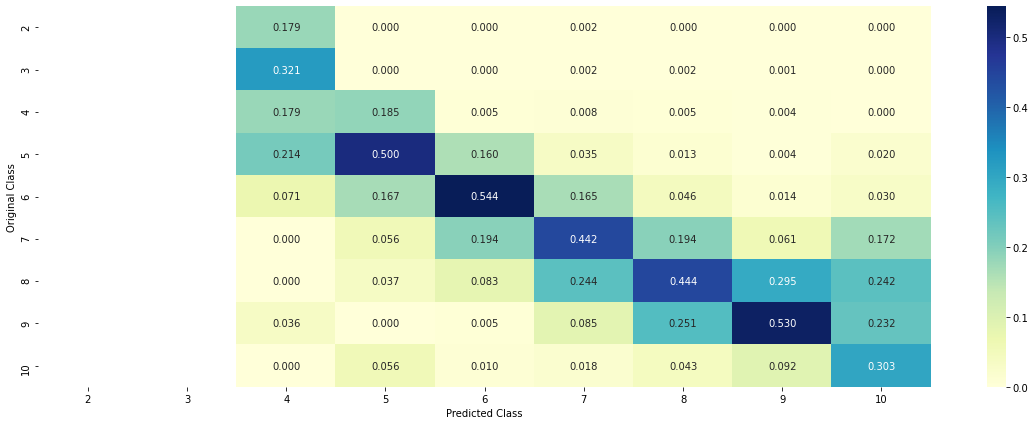

-------------------- Recall matrix (Row sum=1) --------------------


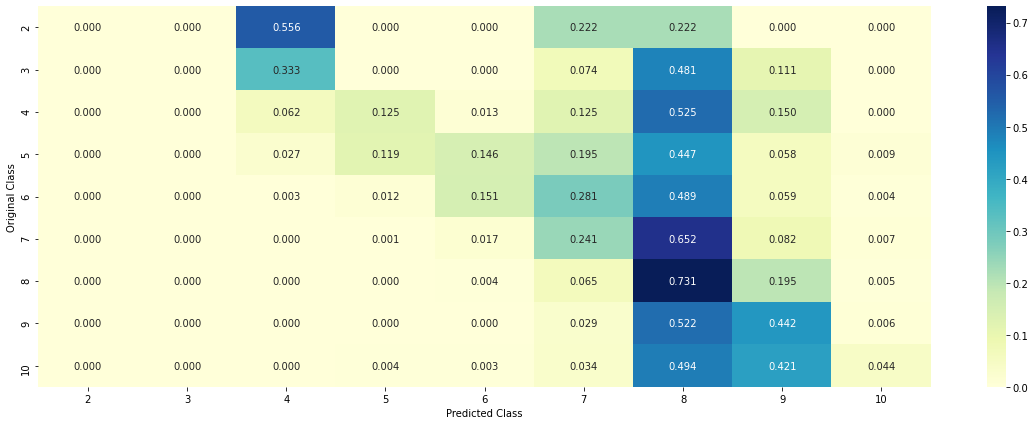

In [0]:

#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(X_train,y_train, X_cv, y_cv, clf)

for alpha = 1e-06
Log Loss : 1.4884716369705802
for alpha = 1e-05
Log Loss : 1.4884716369705802
for alpha = 0.0001
Log Loss : 1.457434176355352
for alpha = 0.001
Log Loss : 1.3941984223736785
for alpha = 0.01
Log Loss : 1.378122085795082
for alpha = 0.1
Log Loss : 1.358763143207812
for alpha = 1
Log Loss : 1.3378206034401101
for alpha = 10
Log Loss : 1.346136304570203
for alpha = 100
Log Loss : 1.3507793518244091
for alpha = 1000
Log Loss : 1.3866365395317828
for alpha = 10000
Log Loss : 1.422417367445205
for alpha = 100000
Log Loss : 1.4045920392327667


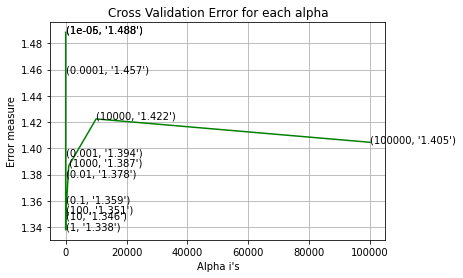

For values of best alpha =  1 The train log loss is: 1.331327913295125
For values of best alpha =  1 The cross validation log loss is: 1.3378206034401101
For values of best alpha =  1 The test log loss is: 1.343950589862178


In [0]:


alpha = [10 ** x for x in range(-6, 6)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.3378206034401101
Number of mis-classified points : 0.5540432983126393
-------------------- Confusion matrix --------------------


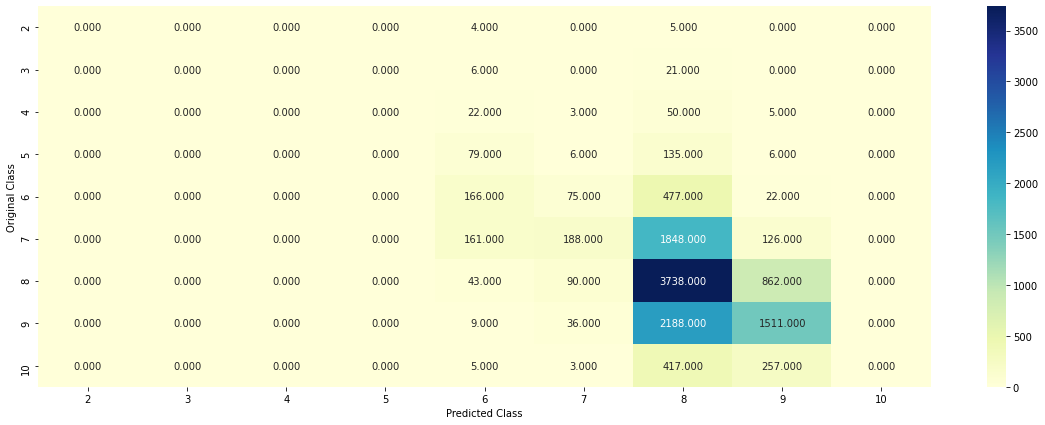

-------------------- Precision matrix (Columm Sum=1) --------------------


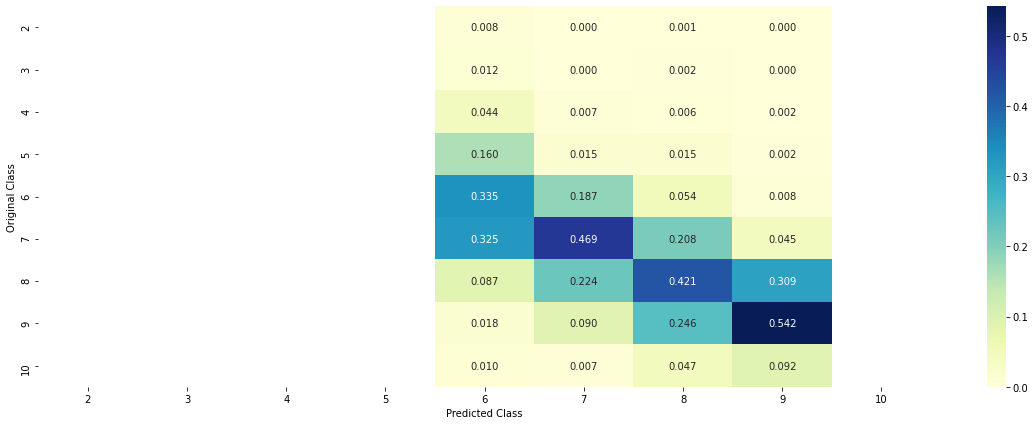

-------------------- Recall matrix (Row sum=1) --------------------


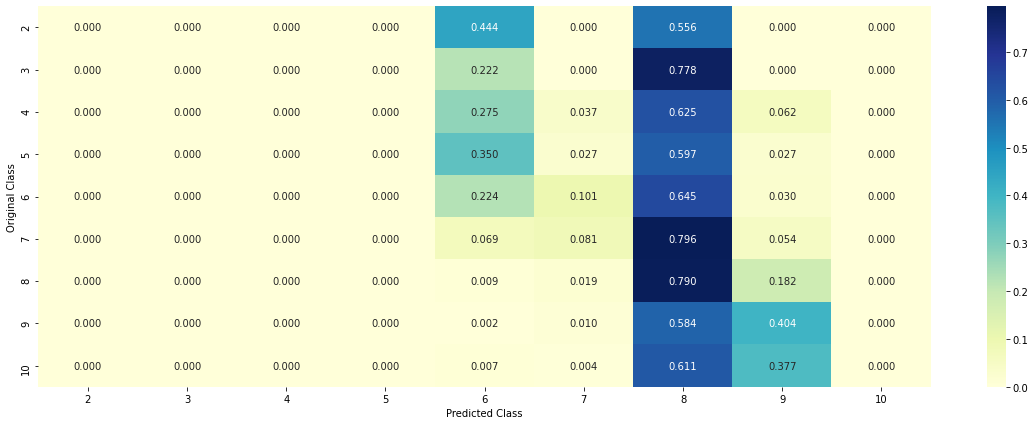

In [0]:

#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(X_train, y_train,X_cv, y_cv, clf)

Ranking              0
Price Range          0
Number of Reviews    0
0_x                  2
1_x                  2
                    ..
91_y                 0
92_y                 0
93_y                 0
94_y                 0
95_y                 0
Length: 195, dtype: int64

for C = 1e-05
Log Loss : 1.4884716369705802
for C = 0.0001
Log Loss : 1.472004724807185
for C = 0.001
Log Loss : 1.378224655454177
for C = 0.01
Log Loss : 1.3688164639072673
for C = 0.1
Log Loss : 1.354249433321038
for C = 1
Log Loss : 1.3435779247459347
for C = 10
Log Loss : 1.3673575895150492
for C = 100
Log Loss : 1.3750736624493778


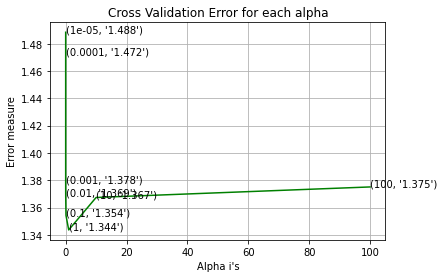

For values of best alpha =  1 The train log loss is: 1.336591138242117
For values of best alpha =  1 The cross validation log loss is: 1.3435779247459347
For values of best alpha =  1 The test log loss is: 1.3486800961335002


In [0]:

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.3435779247459347
Number of mis-classified points : 0.5587392550143266
-------------------- Confusion matrix --------------------


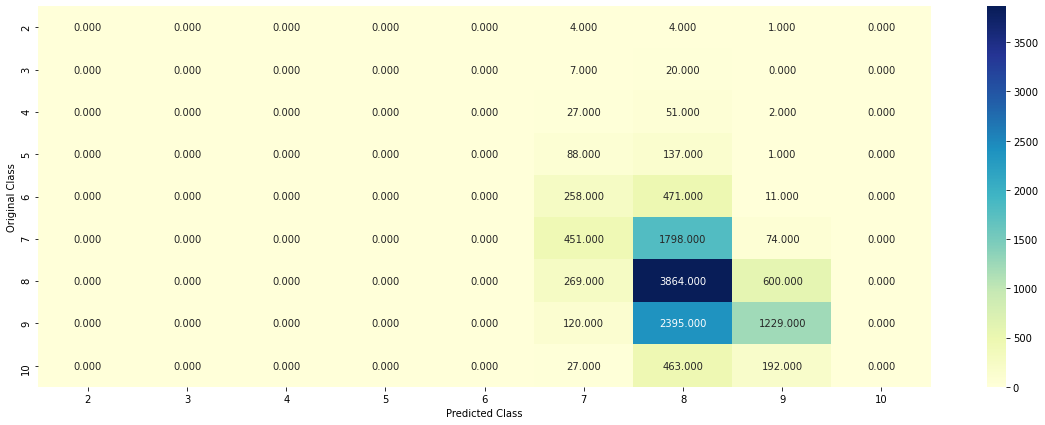

-------------------- Precision matrix (Columm Sum=1) --------------------


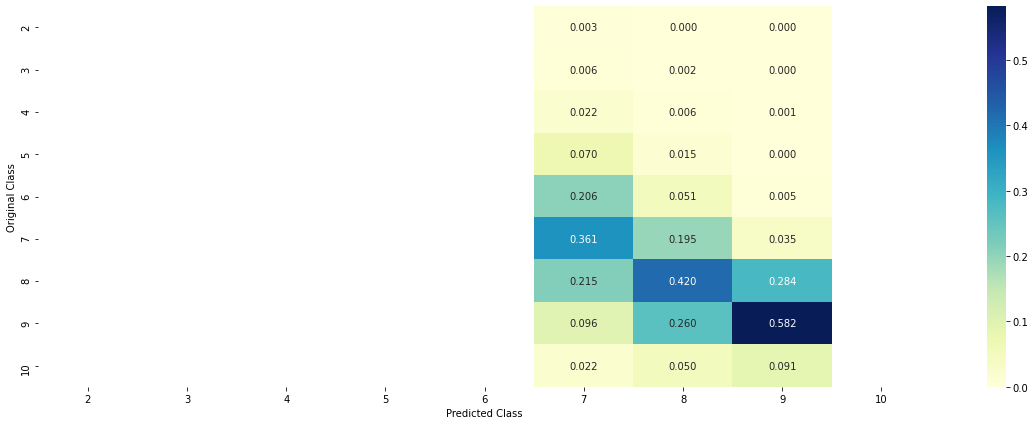

-------------------- Recall matrix (Row sum=1) --------------------


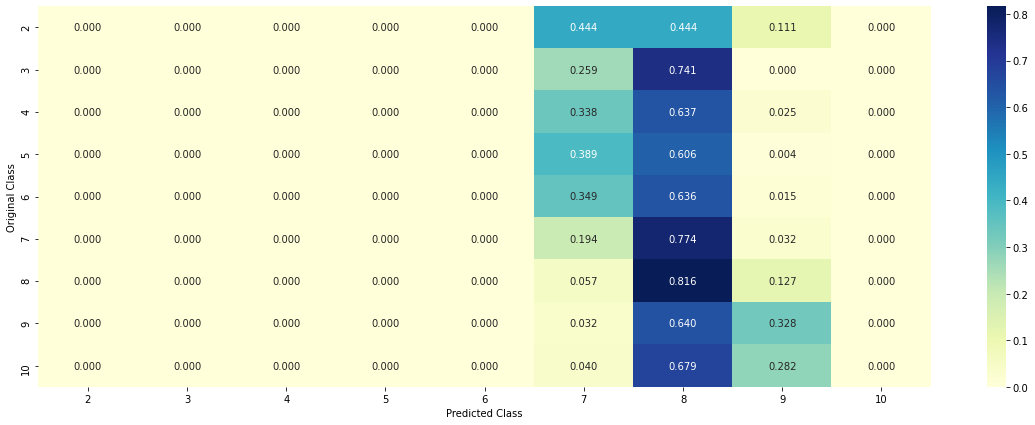

In [0]:


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(X_train,y_train,X_cv,y_cv, clf)

for n_estimators = 100 and max depth =  5
Log Loss : 1.3184885498862557
for n_estimators = 100 and max depth =  10
Log Loss : 1.2588857163193805
for n_estimators = 200 and max depth =  5
Log Loss : 1.3208358073157314
for n_estimators = 200 and max depth =  10
Log Loss : 1.2572198669308021
for n_estimators = 500 and max depth =  5
Log Loss : 1.3207035118327501
for n_estimators = 500 and max depth =  10
Log Loss : 1.2567246186614542
for n_estimators = 1000 and max depth =  5
Log Loss : 1.3175988088997594
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2549241718284427
for n_estimators = 2000 and max depth =  5
Log Loss : 1.3210023717784745
for n_estimators = 2000 and max depth =  10
Log Loss : 1.255447221788459


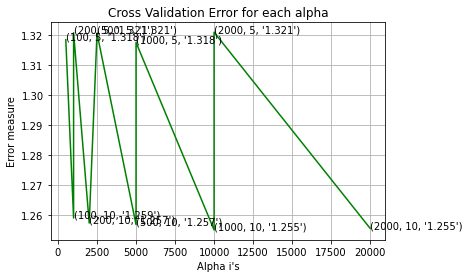

For values of best estimator =  1000 The train log loss is: 0.9752076841891972
For values of best estimator =  1000 The cross validation log loss is: 1.2549241718284427
For values of best estimator =  1000 The test log loss is: 1.2674473441895422


In [0]:

#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train,y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#10,2000

In [0]:

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(X_train,y_train,X_cv,y_cv, clf)

In [0]:
clf1 = SGDClassifier(alpha=100, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train,y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=10, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train,y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 =RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10)
clf3.fit(X_train,y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train,y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(X_cv))))
sig_clf2.fit(X_train,y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(X_cv))))
sig_clf3.fit(X_train,y_train)
print("Random Forest: Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(X_cv))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train,y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(X_cv))))
    log_error =log_loss(y_cv, sclf.predict_proba(X_cv))
    if best_alpha > log_error:
        best_alpha = log_error

In [0]:
lr = LogisticRegression(C=0.01)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train,y_train)

log_error = log_loss(y_train, sclf.predict_proba(X_train))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(X_cv))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(X_test))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(X_test)- y_test))/len(y_test))
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(X_test))

Log loss (train) on the VotingClassifier : 1.0103037784391873
Log loss (CV) on the VotingClassifier : 1.3511391817533684
Log loss (test) on the VotingClassifier : 1.3492793552539142
Number of missclassified point : 0.565
-------------------- Confusion matrix --------------------


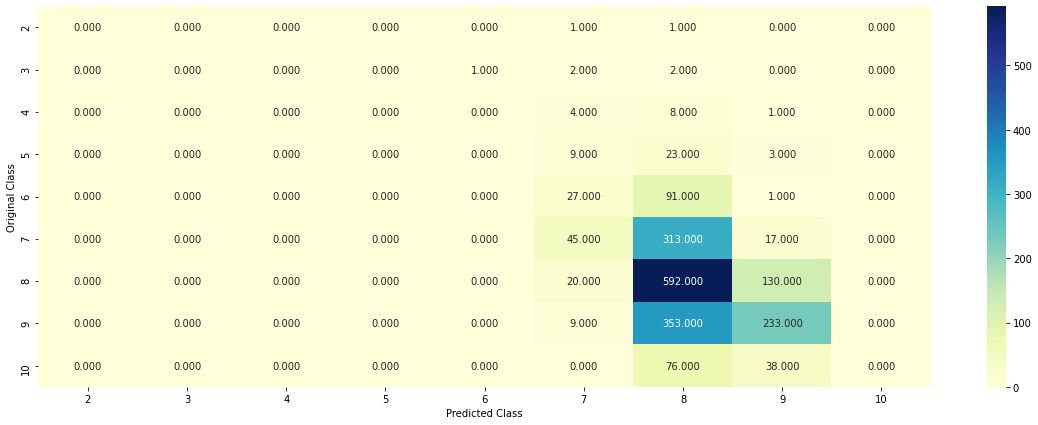

-------------------- Precision matrix (Columm Sum=1) --------------------


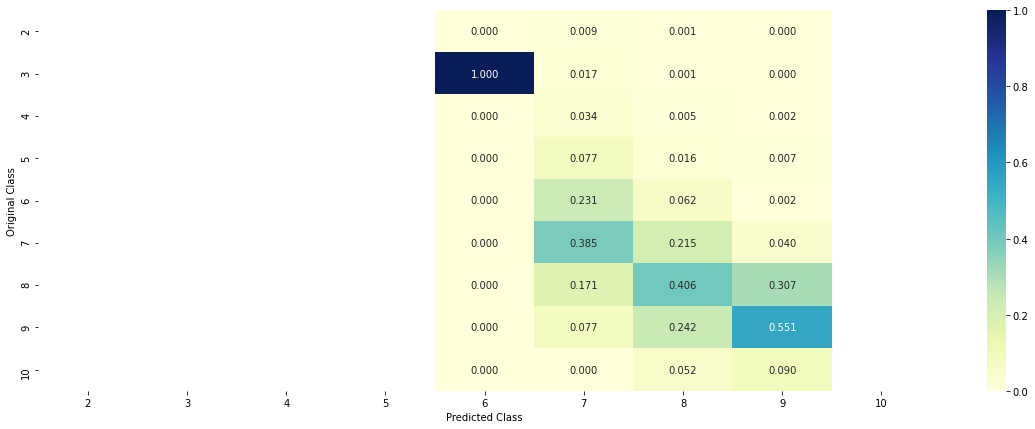

-------------------- Recall matrix (Row sum=1) --------------------


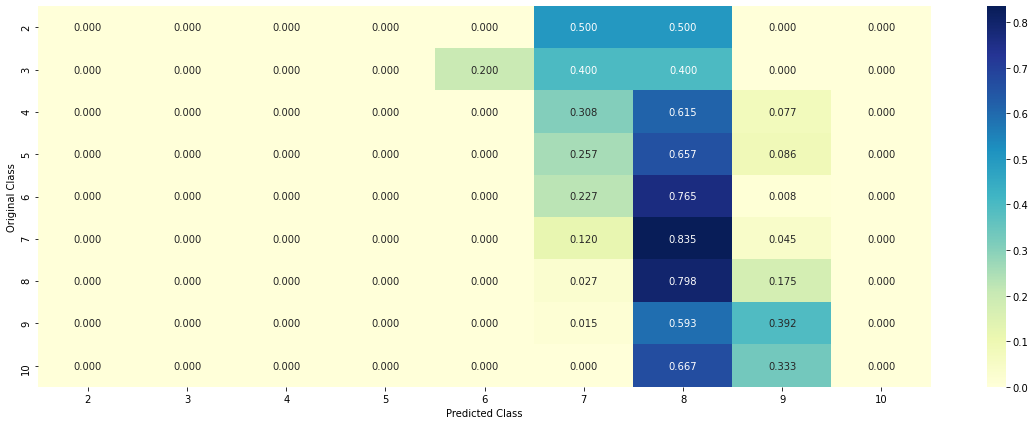

In [0]:

from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(X_train,y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(X_train)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(X_cv)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(X_test)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(X_test)-y_test))/len(y_test))
plot_confusion_matrix(test_y=y_test, predict_y=vclf.predict(X_test))

In [0]:
X_train

array([[2.95303608e+02],
       [7.60113840e-03],
       [2.11288675e-01],
       ...,
       [1.34638908e+00],
       [1.33600587e-01],
       [1.48345550e+00]])

In [0]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_train = rob_scaler.fit_transform(X_train)




In [0]:
X_train

array([[-0.23066024, -1.5       , -0.19205298, ...,  0.1252808 ,
         0.22832043, -0.10765154],
       [-0.3136866 ,  0.        ,  1.60264901, ...,  0.25416488,
         0.85731913,  0.49062434],
       [ 1.04817229,  0.        , -0.09271523, ...,  0.73431386,
         0.77582806, -0.30186039],
       ...,
       [-0.31765373,  0.        , -0.25827815, ...,  1.20431446,
         0.5946321 ,  0.68223107],
       [-0.48342307,  1.5       ,  9.45695364, ...,  1.91612558,
        -0.11918086,  1.35207117],
       [ 0.86738453,  0.        ,  1.02649007, ...,  0.64579603,
        -0.82941362,  0.13207193]])

# NEURAL NETWORk

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

from keras.layers import Dropout

model=Sequential()
model.add(Dense(1028, input_dim=n_inputs, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(11, activation="softmax"))

In [0]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 40202 samples, validate on 10051 samples
Epoch 1/20
 - 21s - loss: 1.4526 - accuracy: 0.3871 - val_loss: 1.3566 - val_accuracy: 0.4147
Epoch 2/20
 - 21s - loss: 1.3511 - accuracy: 0.4279 - val_loss: 1.3127 - val_accuracy: 0.4476
Epoch 3/20
 - 21s - loss: 1.3113 - accuracy: 0.4464 - val_loss: 1.2889 - val_accuracy: 0.4582
Epoch 4/20
 - 21s - loss: 1.2869 - accuracy: 0.4553 - val_loss: 1.2699 - val_accuracy: 0.4636
Epoch 5/20
 - 21s - loss: 1.2609 - accuracy: 0.4672 - val_loss: 1.2495 - val_accuracy: 0.4780
Epoch 6/20
 - 21s - loss: 1.2454 - accuracy: 0.4725 - val_loss: 1.2444 - val_accuracy: 0.4708
Epoch 7/20
 - 21s - loss: 1.2341 - accuracy: 0.4777 - val_loss: 1.2360 - val_accuracy: 0.4724
Epoch 8/20
 - 21s - loss: 1.2244 - accuracy: 0.4843 - val_loss: 1.2221 - val_accuracy: 0.4890
Epoch 9/20
 - 21s - loss: 1.2109 - accuracy: 0.4834 - val_loss: 1.2218 - val_accuracy: 0.4854
Epoch 10/20
 - 21s - loss: 1.2032 - accuracy: 0.4891 - val_loss: 1.2194 - val_accuracy: 0.4857
Epoch 11/

In [0]:
X_train

array([[-0.23066024, -1.5       , -0.19205298, ...,  0.1252808 ,
         0.22832043, -0.10765154],
       [-0.3136866 ,  0.        ,  1.60264901, ...,  0.25416488,
         0.85731913,  0.49062434],
       [ 1.04817229,  0.        , -0.09271523, ...,  0.73431386,
         0.77582806, -0.30186039],
       ...,
       [-0.31765373,  0.        , -0.25827815, ...,  1.20431446,
         0.5946321 ,  0.68223107],
       [-0.48342307,  1.5       ,  9.45695364, ...,  1.91612558,
        -0.11918086,  1.35207117],
       [ 0.86738453,  0.        ,  1.02649007, ...,  0.64579603,
        -0.82941362,  0.13207193]])

In [0]:
X

,Ranking,Price Range,Number of Reviews,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1.0,2.5,136.0,11.777537,-33.104988,1.750928,-2.403883,123.210826,126.156542,46.516413,24.039058,96.999226,157.119891,55.044885,-40.830108,125.351593,-38.957320,9.453428,60.614056,-34.185001,11.791398,-101.261812,-33.546062,50.071802,20.754510,-55.738465,-50.344172,-12.316940,-8.641695,22.437466,-32.584829,100.039083,-63.480687,20.733587,0.042315,-2.335294,-49.815418,5.904805,-34.443860,185.399332,...,1.813918,44.441586,1.149034,-11.023823,7.292255,5.219045,25.463288,23.480221,43.263071,0.612931,48.136861,1.749651,0.275683,-4.217204,-3.707761,-19.017394,-4.085642,8.755226,20.299433,-31.395379,2.211190,-10.424957,-6.281065,60.113095,17.205369,-25.130815,-26.417810,-14.036110,2.034804,16.449422,17.788070,-22.310166,-5.885745,-11.007430,6.466809,-1.977821,5.713768,17.483489,-6.087014,16.133014
1,2.0,4.0,812.0,-8.925963,-19.013340,-26.810258,-17.985258,35.959316,16.790143,22.315591,65.990933,3.299149,33.512501,-8.996798,40.487304,-3.237063,-26.872078,-12.760441,45.213430,-16.092803,6.503277,-46.848392,-26.861324,-1.458920,36.242997,-36.069801,-18.617838,-29.947709,22.718488,-4.106877,-10.521687,49.355247,-53.571581,10.734092,-1.377377,29.316759,-20.680237,-9.771690,-52.650613,34.629750,...,18.237318,47.579906,-0.481212,-10.870086,9.369827,-19.918908,23.658296,14.844763,54.756251,-1.377257,71.667241,-9.172336,35.125399,10.400002,-3.201250,-33.671178,13.629331,1.365654,-7.382932,-36.609050,14.700886,-23.680770,-7.787405,82.333377,28.207112,-34.551681,-29.025491,-12.873963,7.436589,23.650551,-2.665448,-26.318680,-4.238894,-9.368964,26.867660,-2.386264,20.340411,3.553340,8.438831,58.939936
2,3.0,4.0,567.0,61.667895,-62.381252,5.818874,58.017186,105.973235,-29.080484,39.802654,-17.023379,3.864421,53.716306,31.848314,68.861033,-12.681923,-62.459828,-44.214865,-51.872337,-14.191041,27.961206,-51.829499,-46.043650,72.496510,-26.241969,-21.551147,28.215894,-59.019799,-23.795249,-33.694755,-63.087407,146.143433,-33.804234,-2.699848,-20.382959,60.879895,-14.993349,-1.290977,-74.201294,60.061985,...,28.277543,78.463966,-8.493462,-29.128661,-6.138144,2.142487,33.477105,23.926227,82.990610,27.666941,75.971931,-3.697427,-7.762441,3.609674,19.996815,-38.412065,23.672955,25.484543,29.942146,-74.777292,7.643501,-20.327469,-0.977211,63.469118,21.558815,-34.173000,-29.380344,-10.403876,29.333451,57.137460,18.696795,-53.356735,4.531202,-19.798504,4.768966,13.733218,30.312393,27.552122,-10.475188,55.559728
3,4.0,4.0,564.0,48.767842,-48.863613,-7.213205,151.958111,126.116573,33.908058,8.475404,36.064222,115.605462,60.865862,48.130188,73.296208,-12.467051,-77.358961,-61.460830,2.455529,-60.158668,19.004992,-122.903200,-0.623347,86.204471,-49.516415,-8.806679,64.081951,-98.275125,46.690413,-72.728795,-152.930763,159.096283,-94.492490,-15.904269,41.377227,76.832657,-163.375916,-20.748489,-137.585604,114.648353,...,39.188123,114.513545,-20.405005,-32.873686,9.229362,1.162703,53.469571,19.279486,119.744779,38.543396,113.628905,-17.972349,3.822863,15.286812,4.945057,-48.829293,34.787490,17.768419,-0.956473,-73.397314,16.141081,-20.070860,9.330480,83.706379,37.950715,-55.470412,-38.473546,-15.945988,-3.658977,71.975662,15.375071,-58.486927,10.586111,-18.963193,11.429454,11.000769,16.018012,33.124353,5.540451,84.353493
4,5.0,4.0,316.0,-18.095964,-29.178394,-10.607319,16.921035,59.970702,10.177545,-30.774745,71.637193,31.675330,80.205178,36.716170,-0.645760,62.815739,-32.615642,1.329221,29.055282,-10.441609,-12.424177,-50.257521,2.312518,-10.433536,-13.936090,-19.428017,15.686711,-47.490542,-1.113917,-1.404250,-34.836200,36.245357,-70.064153,13.269589

In [0]:
X=X.loc[:,["Ranking","Price Range","Number of Reviews"]]

In [0]:



# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [0]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_train = rob_scaler.fit_transform(X_train)




In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

from keras.layers import Dropout

model=Sequential()
model.add(Dense(1028, input_dim=n_inputs, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(11, activation="softmax"))

In [0]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 40202 samples, validate on 10051 samples
Epoch 1/20
 - 17s - loss: 1.3808 - accuracy: 0.4223 - val_loss: 1.2760 - val_accuracy: 0.4635
Epoch 2/20
 - 17s - loss: 1.3034 - accuracy: 0.4500 - val_loss: 1.2862 - val_accuracy: 0.4480
Epoch 3/20
 - 17s - loss: 1.2865 - accuracy: 0.4559 - val_loss: 1.2527 - val_accuracy: 0.4596
Epoch 4/20
 - 17s - loss: 1.2777 - accuracy: 0.4612 - val_loss: 1.2443 - val_accuracy: 0.4700
Epoch 5/20
 - 17s - loss: 1.2727 - accuracy: 0.4657 - val_loss: 1.2336 - val_accuracy: 0.4817
Epoch 6/20
 - 17s - loss: 1.2695 - accuracy: 0.4674 - val_loss: 1.2319 - val_accuracy: 0.4806
Epoch 7/20
 - 17s - loss: 1.2654 - accuracy: 0.4673 - val_loss: 1.2304 - val_accuracy: 0.4776
Epoch 8/20
 - 17s - loss: 1.2632 - accuracy: 0.4672 - val_loss: 1.2254 - val_accuracy: 0.4786
Epoch 9/20
 - 17s - loss: 1.2624 - accuracy: 0.4667 - val_loss: 1.2319 - val_accuracy: 0.4819
Epoch 10/20
 - 17s - loss: 1.2603 - accuracy: 0.4723 - val_loss: 1.2306 - val_accuracy: 0.4802
Epoch 11/